# 📊 Análisis Exploratorio de Datos (EDA) y Preparación para Dashboard

Este notebook representa la cuarta etapa del pipeline completo de análisis de techos mediante segmentación con **SegFormer**, detección con **YOLOv8**, y análisis de métricas generadas en la inferencia.

## 🎯 Objetivo
El propósito es:
- Cargar los `.csv` de métricas por imagen.
- Validar y limpiar los datos.
- Aplicar análisis exploratorio para obtener insights relevantes.
- Preparar un dataset robusto y saludable para alimentar un dashboard final.

Este análisis nos permitirá:
- Medir la efectividad del pipeline.
- Entender los patrones de daños.
- Enriquecer las visualizaciones futuras.


In [1]:
# 📦 Carga de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configuraciones visuales
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_context("notebook")
%matplotlib inline

# Opcional: control de warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
import os
import pandas as pd
from huggingface_hub import snapshot_download
from pathlib import Path

# ─── 1. Descargar carpeta train_inference/ desde HF ─────────────────────
REPO_ID = "jobejaranom/yolo-roof-damage"
SUBFOLDER = "train_inference"

hf_dir = snapshot_download(
    repo_id=REPO_ID,
    repo_type="model",  # puede ser model o dataset
    allow_patterns=[f"{SUBFOLDER}/*.csv"],
    local_dir="/kaggle/working/train_inference"
)

# ─── 2. Ruta a los archivos *_metrics.csv ───────────────────────────────
METRICS_DIR = Path(hf_dir) / SUBFOLDER
csv_files = sorted(METRICS_DIR.glob("*_metrics.csv"))

print(f"📄 Se encontraron {len(csv_files)} archivos de métricas en Hugging Face.")
assert len(csv_files) > 0, "❌ No se encontraron archivos *_metrics.csv descargados."

# ─── 3. Consolidar todos los CSVs ───────────────────────────────────────
df_list = [pd.read_csv(f) for f in csv_files]
df_metrics = pd.concat(df_list, ignore_index=True)

# ─── 4. Etiqueta el origen del conjunto ─────────────────────────────────
df_metrics["set"] = "train"

# ─── 5. Vista previa ────────────────────────────────────────────────────
df_metrics.head()



Fetching 481 files:   0%|          | 0/481 [00:00<?, ?it/s]

(…)19f2c7fb370bc1f709bbbdb5c28a_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)441dc5f2335f22c4a79a8fdb4546_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…)25d9f7936afaedd7d3af0a17231c_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)693a5494255f854564cf0082267d_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…)b6f5b1c02119ecb41b9d8eef3fa6_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)e7941c5e46dae7ba52f43b323b41_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)800281cdbc9b47aa01d3bcb8651a_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…)272c6448140017e8f7b23951bdbe_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)ee5ce97bcbf4a9e0d96f949452aa_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)84dd71cb994496c9d6b00af02de0_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)9041406dc27495eb447a9bd15add_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)f81595eea64b05c22d6a3986f8d0_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)b5972c33de532fae60d3ae632c58_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)f4ec28a718f7e203b91b50bcbd4c_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)58e7de28af3abe7920ff074de923_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)14b5fc5865fdbd76e083329cb586_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)08b30d1c85fce603c2feb0ded862_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)44c9d56755bf8d3ae992245501f0_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)283f18995ef6f6bcf1ccb1dc78c3_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)189013476a458d04180a06437687_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)6fe9b740855be26622fe7357a09e_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)91da6d1a92fbcafd95886888be45_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)05d5d323c4b44980f0353c3b3ad4_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)6347901dd4615641a799dba4d481_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)3a0321786437f28017115e8152c0_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)ca7ea3983b00f1efdb771cefd9cd_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)e96abf1b95f6f51e4a8b8a7ec7bd_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)07a31d8e9e7f18345608c0ae0be5_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)1b3add99b0f894f3d85acb93166e_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)547cc9081d9ac19ae033aaec4a25_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)50125b490a0d996414ba7abc9116_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)b9e9dbfc1ab6062f49279085b50a_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)5893eaca702bd1bfd86b8d117dd6_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)6da3110523de68008adbf6cebeee_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)590360fb96e1a4e820b20ef66be2_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)edb6903d5de89d3a7fc9b67d49b5_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)cb537cb7e144ebc2d99c4d06b879_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)c62b44af09f265e6a87471fe2d9a_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)cb8f1e47b0fe476c99c59cb74d50_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)78c84bb41e0651436188fd96fdab_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)75622e7eabdd726ab104440e668b_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)0e0cd604b7211637e891af009773_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)50dc8d33ac02fb50216ee4a7b371_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)44c80b82817422b3f9c22e957cd2_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)7878116478d76e1cb97bab816e95_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)85426796a466bb411343aa2852e2_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)1e2ee77fade62d36c2f7414835c3_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)75edaf44efb1bfb02d0159f6d944_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…)ec07f6862cef932949c4b87dad94_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…)550c9e3bd465d22253cbd3c4a555_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…)de7e10ae413a49cd5106b46f8eac_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)973ebed97a0dd3ba2c7f70e838f0_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)e0ad43e6324c99095b0fa8d913d3_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)819a65cd882390e6598bc8365bcc_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)bba235bb26080fda9a0a38d0b799_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)9c38b013e1fe1ace44658f7adb25_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)9ff7db037781a7f2d078b3017285_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)309eac51974d8b8afbb5151bfc47_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)b94ff783ab0120df87bb0d46a111_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)d67a3b5cadc430c5fe32492aa720_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)45f49b655a27c5c675717451ad34_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)40cc57096794fa65f1e706196544_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)24655e678098a121e8204d501170_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)c6bc02cb4b7e1d584c4fd0b0aac3_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)c30ef69f992e58ae16e6b0c74dbd_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)f0ff1d2478dc9dce5de6cfe26d69_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)eb9155fbad6aa38e7180f097deab_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)debbeaf328ff5a883d97b3131b24_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)7f5cfc6b833dd0685ece6d579f96_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)be26e11e0f5afd4f77f4dc399425_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)abe2b9ee51350c9fb4eb758a208f_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)0823780347d6b653c66115555de5_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)02ee349997290f14d8654cbf4ed4_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)eff2a151f532da6e4f047a002cea_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)8071555b16aea946245629ba7a3a_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)42dad4473379c4e87b52362639e2_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)c76cdcec4e7c31c89bdabc1f6938_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)80b5ceae02268716f1682963ec4f_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)ba54794c13c2975da13d76b19971_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)3c97d7791fc7258251b27898f534_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)eb5d190dc0b6a66a98a0aa33d08a_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)fe814656a4bdd54ee6b36ff0a1b8_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)a6310802033e0bb2399faf7716f0_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)cba2c78f484aaedb2f9f5158a993_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)241d04755afa8c51501b08ce1ce9_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)cc449c5df8010ad73a0ba5a16281_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)30376fae34409febe1335b552be0_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)7504cfc788038dedc5594c2fc538_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)bc965e78f5c5387992404703d6a2_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)44ffcd9ad4855e35b9c7fd22f0d7_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)e51b80c63c4c06d52725a7588a27_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)5b5c100e82061e51b4823353a11f_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)cb9a9c7b4a7f9472104696c4a4bd_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)95b72874442cc84f44fa4074efd7_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)71263d6b0c5644df7e51ce8a294e_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)a5f135997767c7c1c1c72e1088dc_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)8a518fe1317847e8a6b335a65397_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)eb17ee8c8452a67cb101b99e4af7_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)7293a7bdd154337ef3ed49062abc_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)9bd3037885fc0a232520aaa86c62_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)21ec834a38b8f62ffaa42b58a604_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)e944aaa6f8727856763308a09a25_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)9747c872f6ae4b8d3f43574e478e_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)fdd48aea346d5b78ba99ce3b3b99_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)dd310a26812a3383e666aa8ae34c_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)f8ef2365175cfcc297c268ab5993_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)2500e1320daf2857d66a852ebece_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)0eaa2a1009db2e3e07b51a96d4c5_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)af0877b329b978ea77d452c1917f_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)8a55ca7f44ad8b8510426cd669da_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)13c42f956e9ad97996bb50142572_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)7f1a9944e61a4f3e51d8c1a326b2_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)aae1aa93b2ca1c85de3936877054_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)1b1f3760f95d36d763d0693fb1dc_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)eb414cef89adcb9c9a17d5107d9a_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)5fa6bd85b82830c197141c597213_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…)89fbf6e9356ab0fffe640b9f2bba_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…)dcf7a905f91ac206e9d6ac02e1fb_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)4dd0b4292cec1aa348d9ecb5ceab_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)223b82b548a2ece76f214a7bccdc_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)69e58d7add999bf685f477ff7f1c_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…)a16edd3358b55d6a80718da824f2_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)9cf6821fee5220b7ce4639216df5_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)c24af68b217256e2c893768c196a_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)022944b87365b1991a938646824e_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)856bd495ac3eaf7488b2b5f77f22_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)6298f99366b76747a064f4ec2f32_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)c3751b1c603031899f135e9a1c71_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)f72da86ed07a9fd22aba4eadf5ae_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)6b40500a71782618aeba9eed18e8_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

📄 Se encontraron 481 archivos de métricas en Hugging Face.


,image,roof_area_px,damage_count,damage_density,mean_confidence,max_confidence,set
0,austin11_1536_512_png.rf.c1e9ea245fb7b426ea864...,262144,0,0.0,0.0,0.0,train
1,austin11_1536_512_png.rf.cbc283c21ae254df661b6...,262144,0,0.0,0.0,0.0,train
2,austin11_2560_2048_png.rf.467e42305b8c43ab7bd9...,262144,0,0.0,0.0,0.0,train
3,austin11_2560_2048_png.rf.614a809f716f7df27694...,262144,0,0.0,0.0,0.0,train
4,austin11_2560_2048_png.rf.c0f2725e2ff82ca27199...,262144,0,0.0,0.0,0.0,train


## 🔍 Exploración Inicial del Dataset de Métricas

En esta sección realizaremos un análisis exploratorio inicial del DataFrame `df_metrics`, que contiene las métricas generadas por el sistema de inferencia (SegFormer + YOLOv8) sobre las imágenes de prueba.

El objetivo de esta etapa es:

- Verificar la estructura del dataset (filas, columnas, tipos de datos).
- Detectar posibles valores nulos o atípicos.
- Entender las dimensiones generales del conjunto de datos antes de hacer visualizaciones o transformaciones.

Esta es una buena práctica fundamental en cualquier flujo de análisis de datos, ya que nos permite asegurar la calidad del dataset antes de cualquier modelado o visualización avanzada.


📦 Dimensiones del DataFrame:
➡️ Filas: 481  |  Columnas: 7

🔍 Tipos de datos y valores nulos:



,Tipo de Dato,Nulos
image,object,0
roof_area_px,int64,0
damage_count,int64,0
damage_density,float64,0
mean_confidence,float64,0
max_confidence,float64,0
set,object,0



📊 Estadísticas descriptivas por feature numérico:



,count,mean,std,min,25%,50%,75%,max
roof_area_px,481.000,262144.000,0.000,262144.000,262144.000,262144.000,262144.000,262144.000
damage_count,481.000,0.333,1.398,0.000,0.000,0.000,0.000,16.000
damage_density,481.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
mean_confidence,481.000,0.065,0.170,0.000,0.000,0.000,0.000,0.957
max_confidence,481.000,0.072,0.191,0.000,0.000,0.000,0.000,0.970


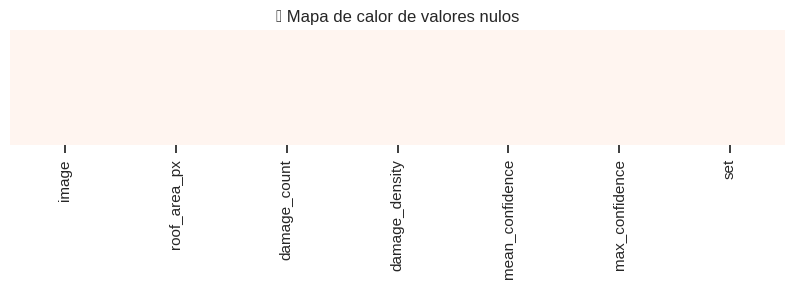

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# ─── 1. Información general ──────────────────────────────────────────────
print("📦 Dimensiones del DataFrame:")
print(f"➡️ Filas: {df_metrics.shape[0]}  |  Columnas: {df_metrics.shape[1]}")

# ─── 2. Tipos de datos y conteo de nulos ─────────────────────────────────
print("\n🔍 Tipos de datos y valores nulos:\n")
nulls = df_metrics.isnull().sum()
dtypes = df_metrics.dtypes
info_df = pd.DataFrame({"Tipo de Dato": dtypes, "Nulos": nulls})
display(info_df)

# ─── 3. Estadísticas descriptivas ────────────────────────────────────────
print("\n📊 Estadísticas descriptivas por feature numérico:\n")
display(df_metrics.describe().T.style.background_gradient(cmap='Blues').format(precision=3))

# ─── 4. Mapa de calor de nulos ───────────────────────────────────────────
plt.figure(figsize=(10, 1.5))
sns.heatmap(df_metrics.isnull(), cbar=False, cmap="Reds", yticklabels=False)
plt.title("🚨 Mapa de calor de valores nulos", fontsize=12)
plt.tight_layout()
plt.show()


## 📊 Visualización Univariada de Métricas

En esta sección exploramos visualmente la distribución de las principales métricas numéricas:

- `damage_count`: cantidad de daños detectados por imagen.
- `damage_density`: densidad de daños (daños por pixel de techo).
- `mean_confidence`: confianza media de las predicciones.
- `max_confidence`: confianza máxima observada.

Estas visualizaciones nos permiten entender si los datos están sesgados, contienen outliers o si hay patrones interesantes que pueden influir en etapas posteriores del análisis.

Utilizaremos histogramas, boxplots y gráficas de dispersión cuando sea necesario.


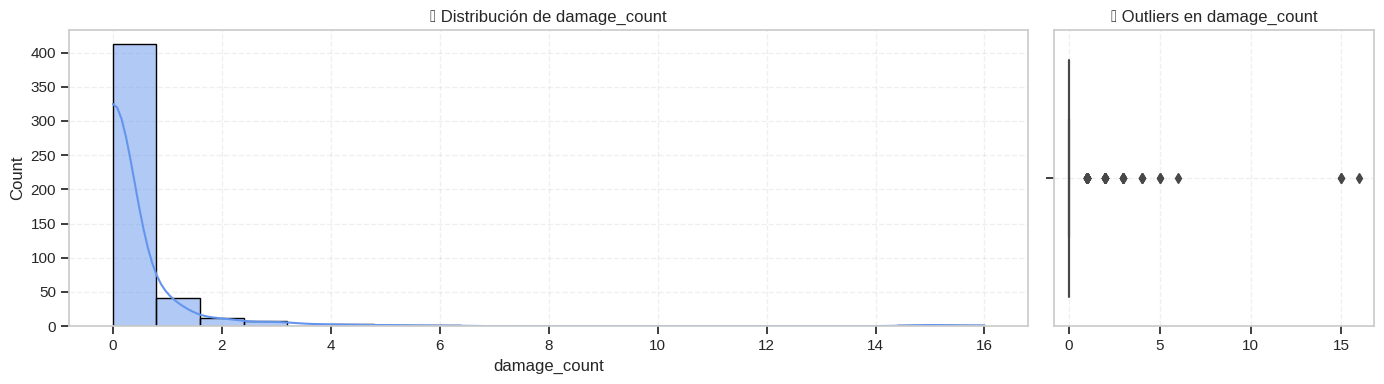

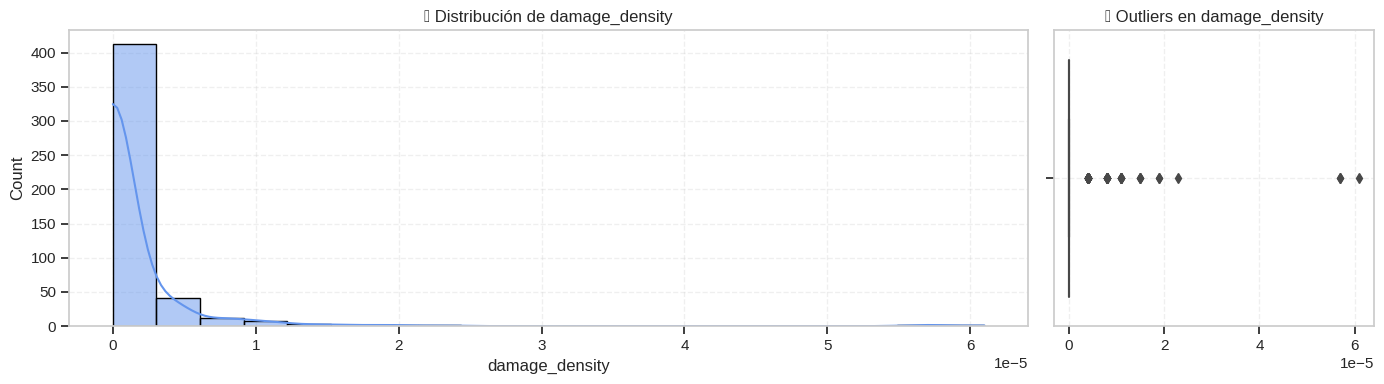

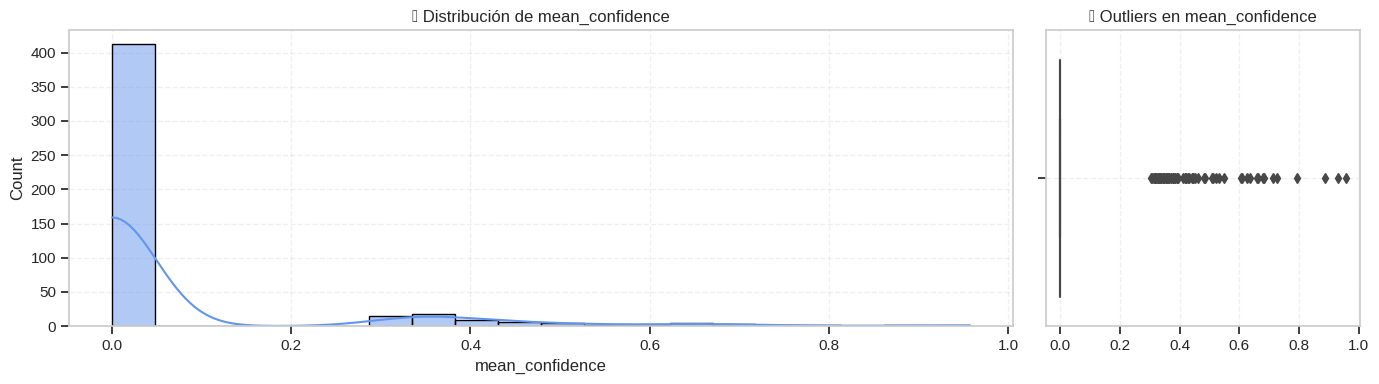

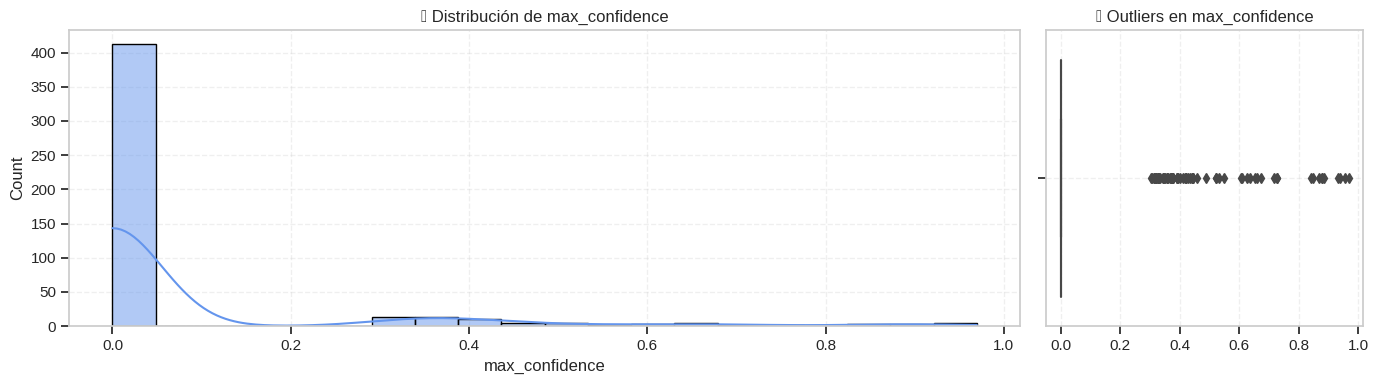

In [5]:
# Columnas numéricas relevantes
metricas = ["damage_count", "damage_density", "mean_confidence", "max_confidence"]

# Visualización refinada de distribución y outliers
for col in metricas:
    fig, axs = plt.subplots(1, 2, figsize=(14, 4), gridspec_kw={'width_ratios': [3, 1]})
    
    # Histograma con KDE
    sns.histplot(data=df_metrics, x=col, bins=20, kde=True, ax=axs[0], color='cornflowerblue')
    axs[0].set_title(f"📈 Distribución de {col}", fontsize=12)
    axs[0].set_xlabel(col)
    axs[0].grid(True, linestyle='--', alpha=0.3)

    # Boxplot
    sns.boxplot(data=df_metrics, x=col, ax=axs[1], color='mediumseagreen')
    axs[1].set_title(f"📦 Outliers en {col}", fontsize=12)
    axs[1].set_xlabel("")
    axs[1].grid(True, linestyle='--', alpha=0.3)
    
    plt.tight_layout()
    plt.show()


## 🔍 Análisis Bivariado y Correlacional

Una vez entendido el comportamiento individual de las métricas generadas por el modelo (EDA univariado), el siguiente paso es estudiar cómo se relacionan entre sí.

Este análisis bivariado y correlacional permite responder preguntas como:

- ¿Las imágenes con más daños detectados también tienen mayor confianza promedio?
- ¿Existe relación entre la densidad de daño y la cantidad de objetos detectados?
- ¿Hay colinealidad entre variables que debamos tener en cuenta para visualizaciones y dashboards?

Además, este paso puede revelar agrupaciones naturales en los datos y es crucial para extraer **insights accionables**.


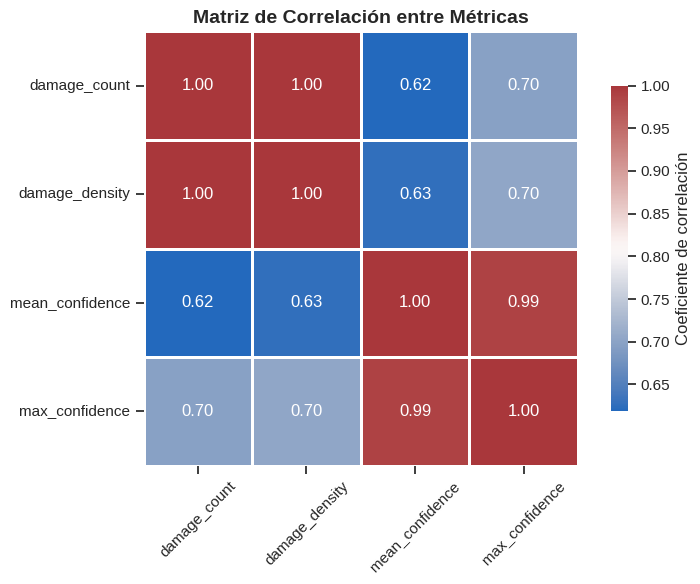

In [6]:
# 🔍 Variables numéricas relevantes
num_cols = ['damage_count', 'damage_density', 'mean_confidence', 'max_confidence']

# Calcular matriz de correlación (Pearson por defecto)
corr_matrix = df_metrics[num_cols].corr()

# Visualización refinada
plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    linewidths=1,
    linecolor="white",
    square=True,
    cbar_kws={"shrink": 0.75, "label": "Coeficiente de correlación"}
)
plt.title("Matriz de Correlación entre Métricas", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


## 🧬 Análisis de Agrupamiento (Clustering) con K-Means

Dado que el dataset contiene métricas numéricas con alta correlación, realizaremos un análisis de agrupamiento usando K-Means para clasificar las imágenes en grupos similares según su comportamiento.

Esto puede ser útil para:

- Identificar patrones recurrentes.
- Segmentar imágenes por nivel de daño.
- Visualizar agrupaciones en el dashboard.

Se utilizarán las variables numéricas previamente analizadas (`damage_count`, `mean_confidence`, `max_confidence`) como base para el clustering.


📈 Silhouette Score: 0.9361


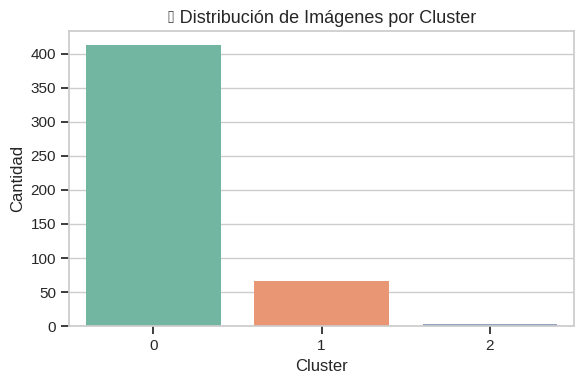

,damage_count,mean_confidence,max_confidence
cluster,,,
0,0.0000,0.0000,0.0000
1,1.7273,0.4448,0.4813
2,15.3333,0.6663,0.9302


In [7]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# ─── 1. Selección de características ───────────────────────────────────
features = ['damage_count', 'mean_confidence', 'max_confidence']
X = df_metrics[features].values

# ─── 2. Escalado estándar ──────────────────────────────────────────────
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ─── 3. KMeans con K=3 ─────────────────────────────────────────────────
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df_metrics["cluster"] = kmeans.fit_predict(X_scaled)

# ─── 4. Evaluación del clustering ──────────────────────────────────────
sil_score = silhouette_score(X_scaled, df_metrics["cluster"])
print(f"📈 Silhouette Score: {sil_score:.4f}")

# ─── 5. Visualización de cantidad por cluster ──────────────────────────
plt.figure(figsize=(6, 4))
sns.countplot(x="cluster", data=df_metrics, palette="Set2")
plt.title("📊 Distribución de Imágenes por Cluster", fontsize=13)
plt.xlabel("Cluster")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

# ─── 6. Promedios por cluster ──────────────────────────────────────────
cluster_summary = df_metrics.groupby("cluster")[features].mean().round(4)
display(cluster_summary)


## 🧠 Validación de Clustering mediante PCA (Análisis de Componentes Principales)

Para comprobar la coherencia estructural de los clusters generados por KMeans, aplicamos **PCA (Principal Component Analysis)** con el objetivo de proyectar los datos en un espacio bidimensional donde las componentes capturen la mayor varianza posible.

Este análisis nos permite:

- Validar si los clusters generados poseen una separación **natural y significativa**.
- Facilitar una **visualización clara e interpretativa** del comportamiento del modelo de agrupamiento.
- Preparar el dataset para su futura integración en dashboards interactivos (por ejemplo, visualizaciones tipo scatter con `Plotly`, `Dash` o `Gradio`).

El resultado es un gráfico que muestra la distribución de los datos según las dos primeras componentes principales (`PCA1`, `PCA2`), coloreados por el cluster al que pertenecen. Una separación visual clara entre clusters respalda la calidad del modelo de segmentación.


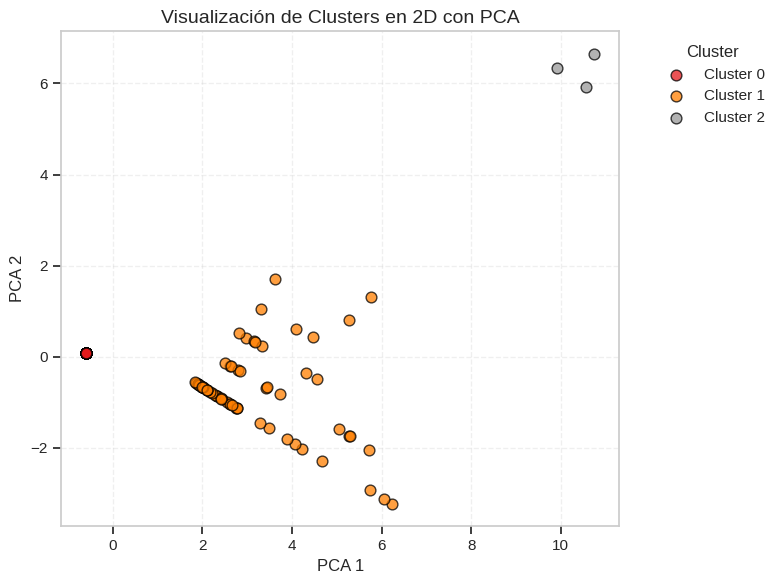

In [8]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# ─── 1. Reutilizar features ya escaladas ───────────────────────────────
X_pca = scaler.transform(X)

# ─── 2. Reducción a 2 dimensiones con PCA ───────────────────────────────
pca = PCA(n_components=2, random_state=42)
components = pca.fit_transform(X_pca)

# ─── 3. Agregar componentes al DataFrame ───────────────────────────────
df_metrics["PCA1"] = components[:, 0]
df_metrics["PCA2"] = components[:, 1]

# ─── 4. Visualizar en espacio 2D ────────────────────────────────────────
plt.figure(figsize=(8, 6))
palette = cm.get_cmap("Set1", len(df_metrics["cluster"].unique()))

for cluster_id in sorted(df_metrics["cluster"].unique()):
    cluster_data = df_metrics[df_metrics["cluster"] == cluster_id]
    plt.scatter(cluster_data["PCA1"], cluster_data["PCA2"],
                label=f"Cluster {cluster_id}",
                alpha=0.75,
                s=60,
                edgecolors='k',
                color=palette(cluster_id))

plt.xlabel("PCA 1", fontsize=12)
plt.ylabel("PCA 2", fontsize=12)
plt.title("Visualización de Clusters en 2D con PCA", fontsize=14)
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()



## 🖼️ Visualización de Imágenes Representativas por Cluster

Para entender mejor cómo se comporta el modelo en cada grupo, mostraremos ejemplos visuales por cluster:

- Cluster 0: sin detecciones (control).
- Cluster 1: detecciones con confianza media.
- Cluster 2: detecciones múltiples y seguras.

Estas imágenes permitirán validar visualmente la calidad de las predicciones y fortalecer el análisis exploratorio.


In [12]:
import time
import os
from pathlib import Path
from huggingface_hub import snapshot_download, HfFolder
from kaggle_secrets import UserSecretsClient

# === 1. Obtener token de Kaggle Secrets (seguro) ===
try:
    user_secrets = UserSecretsClient()
    hf_token = user_secrets.get_secret("HF_TOKEN")
except Exception as e:
    raise RuntimeError("❌ No se pudo acceder al token HF_TOKEN desde Kaggle Secrets.") from e

assert hf_token, "❌ El token HF_TOKEN está vacío o no definido."

# Guardar localmente (opcional para funciones que lo requieran)
HfFolder.save_token(hf_token)

# === 2. Configuración del repositorio ===
repo_id = "jobejaranom/yolo-roof-damage"
subfolder = "train_inference"
render_dir = Path("results/train_inference")

# === 3. Función robusta para descarga con reintento ===
def safe_download_folder(repo_id, subfolder, target_dir, token, max_retries=3, wait_sec=30):
    attempt = 0
    while attempt < max_retries:
        try:
            print(f"📦 Intento {attempt + 1}/{max_retries}: descargando '{subfolder}'...")
            return snapshot_download(
                repo_id=repo_id,
                allow_patterns=[f"{subfolder}/*"],
                repo_type="model",
                local_dir=target_dir,
                token=token,
                resume_download=True,
                max_workers=2
            )
        except Exception as e:
            print(f"⚠️ Error en intento {attempt + 1}: {e}")
            if "429" in str(e) or "Too Many Requests" in str(e):
                print(f"⏳ Esperando {wait_sec} segundos para reintentar...")
                time.sleep(wait_sec)
                attempt += 1
            else:
                raise e
    raise RuntimeError("❌ Fallaron todos los intentos de descarga desde Hugging Face.")

# === 4. Verificación previa y descarga ===
if render_dir.exists() and any(render_dir.rglob("*.jpg")):
    print(f"✅ Ya existen archivos en: {render_dir.resolve()} (descarga omitida)")
else:
    safe_download_folder(repo_id, subfolder, render_dir, hf_token)

# === 5. Confirmación final ===
assert render_dir.exists(), f"❌ No existe: {render_dir.resolve()}"
print(f"✅ Carpeta descargada exitosamente: {render_dir.resolve()}")




📦 Intento 1/3: descargando 'train_inference'...


Fetching 963 files:   0%|          | 0/963 [00:00<?, ?it/s]

(…).rf.c1e9ea245fb7b426ea864758697162ca.jpg:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

README.md:   0%|          | 0.00/401 [00:00<?, ?B/s]

(…)ea245fb7b426ea864758697162ca_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.cbc283c21ae254df661b6ff59e721246.jpg:   0%|          | 0.00/43.3k [00:00<?, ?B/s]

(…)83c21ae254df661b6ff59e721246_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.467e42305b8c43ab7bd91b8e570725ab.jpg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

(…)42305b8c43ab7bd91b8e570725ab_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.614a809f716f7df276945ed0b2585d9b.jpg:   0%|          | 0.00/40.3k [00:00<?, ?B/s]

(…)809f716f7df276945ed0b2585d9b_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.c0f2725e2ff82ca27199e507a7e49502.jpg:   0%|          | 0.00/38.3k [00:00<?, ?B/s]

(…)725e2ff82ca27199e507a7e49502_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.7744b5166ca1cda71ec546fe3ad2e77e.jpg:   0%|          | 0.00/50.4k [00:00<?, ?B/s]

(…)b5166ca1cda71ec546fe3ad2e77e_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…).rf.95d77258e56c0606b38d358452e2aca7.jpg:   0%|          | 0.00/61.3k [00:00<?, ?B/s]

(…)7258e56c0606b38d358452e2aca7_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.eee811c85d9232fad869c9d6d2f0729d.jpg:   0%|          | 0.00/56.2k [00:00<?, ?B/s]

(…)11c85d9232fad869c9d6d2f0729d_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…).rf.164b73c689326b8ef23395e69ff3c33c.jpg:   0%|          | 0.00/45.4k [00:00<?, ?B/s]

(…)73c689326b8ef23395e69ff3c33c_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.2f6719277d3e08cf5cacd1b6940fa4bb.jpg:   0%|          | 0.00/42.2k [00:00<?, ?B/s]

(…)19277d3e08cf5cacd1b6940fa4bb_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.327a05589676a30782ff2042fbd6adcb.jpg:   0%|          | 0.00/39.5k [00:00<?, ?B/s]

(…)05589676a30782ff2042fbd6adcb_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.a2deb16d3ed1791d7f351696d7874021.jpg:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

(…)b16d3ed1791d7f351696d7874021_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.d64d763e825bd6396ed55a421916d338.jpg:   0%|          | 0.00/44.1k [00:00<?, ?B/s]

(…)763e825bd6396ed55a421916d338_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.0ec13c7dc912528190e2b93eed2ca572.jpg:   0%|          | 0.00/31.1k [00:00<?, ?B/s]

(…)3c7dc912528190e2b93eed2ca572_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.46e4a87497fac79ea961c6345a0075a6.jpg:   0%|          | 0.00/25.8k [00:00<?, ?B/s]

(…)a87497fac79ea961c6345a0075a6_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.9607cecfb02741f224eb649c741e71fa.jpg:   0%|          | 0.00/21.3k [00:00<?, ?B/s]

(…)cecfb02741f224eb649c741e71fa_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.64b8a7a4fecd63c94adce388eb023e55.jpg:   0%|          | 0.00/32.8k [00:00<?, ?B/s]

(…)a7a4fecd63c94adce388eb023e55_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.ca6c8348f1294ed144c462124241b300.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

(…)8348f1294ed144c462124241b300_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.e5db14ea9c3a033e181fe041c41dbe01.jpg:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

(…)14ea9c3a033e181fe041c41dbe01_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)045ae10eac083f57372069766f80_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.3445045ae10eac083f57372069766f80.jpg:   0%|          | 0.00/54.3k [00:00<?, ?B/s]

(…).rf.89fa4138906f6042a6cc33481954d38d.jpg:   0%|          | 0.00/67.7k [00:00<?, ?B/s]

(…)4138906f6042a6cc33481954d38d_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)2826697325100b6c1d125dc80d0c_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.8bab2826697325100b6c1d125dc80d0c.jpg:   0%|          | 0.00/52.6k [00:00<?, ?B/s]

(…).rf.0c521d101d4cfca9e81668d1fce6e266.jpg:   0%|          | 0.00/54.4k [00:00<?, ?B/s]

(…)1d101d4cfca9e81668d1fce6e266_metrics.csv:   0%|          | 0.00/168 [00:00<?, ?B/s]

(…).rf.8039570e56ed5bd323443c3bceca28a5.jpg:   0%|          | 0.00/47.7k [00:00<?, ?B/s]

(…)570e56ed5bd323443c3bceca28a5_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)c2bfa12527e0ecbc1bcef0e53aea_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…).rf.d5d0c2bfa12527e0ecbc1bcef0e53aea.jpg:   0%|          | 0.00/46.6k [00:00<?, ?B/s]

(…).rf.340b24e0298a7b90809ff2e5bbf2a740.jpg:   0%|          | 0.00/47.1k [00:00<?, ?B/s]

(…)24e0298a7b90809ff2e5bbf2a740_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.7a5dd320191b776f70158da3fa88ab2d.jpg:   0%|          | 0.00/52.0k [00:00<?, ?B/s]

(…)d320191b776f70158da3fa88ab2d_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.8c7cb033000c67e24a921dfee48c525a.jpg:   0%|          | 0.00/42.7k [00:00<?, ?B/s]

(…)b033000c67e24a921dfee48c525a_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.afb8c1a4f3e2319010cdccb8f40387fc.jpg:   0%|          | 0.00/36.8k [00:00<?, ?B/s]

(…).rf.bc09875f8e7bf708fdd57fc0ad710482.jpg:   0%|          | 0.00/37.1k [00:00<?, ?B/s]

(…)c1a4f3e2319010cdccb8f40387fc_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)875f8e7bf708fdd57fc0ad710482_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.dfbda08257c61a06f6c5a095f4beabf1.jpg:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

(…)a08257c61a06f6c5a095f4beabf1_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.401b9faaf9931d3329b144b8fb8f6197.jpg:   0%|          | 0.00/22.6k [00:00<?, ?B/s]

(…)9faaf9931d3329b144b8fb8f6197_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…).rf.d1e2a4f69e4ddce9d4e71988ee72c1e7.jpg:   0%|          | 0.00/24.7k [00:00<?, ?B/s]

(…)a4f69e4ddce9d4e71988ee72c1e7_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.ec9c0671bc59cba0886fbbe773fba235.jpg:   0%|          | 0.00/22.7k [00:00<?, ?B/s]

(…)0671bc59cba0886fbbe773fba235_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…).rf.1763c65067d3db8e433f409e3943a532.jpg:   0%|          | 0.00/44.4k [00:00<?, ?B/s]

(…)c65067d3db8e433f409e3943a532_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.a11f64f8926c4e3596cfb40819f240fa.jpg:   0%|          | 0.00/50.6k [00:00<?, ?B/s]

(…)64f8926c4e3596cfb40819f240fa_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.f4c4f9035e2d98481d66b7f98a84f667.jpg:   0%|          | 0.00/45.0k [00:00<?, ?B/s]

(…)f9035e2d98481d66b7f98a84f667_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)4a0074005e734e7113844c7918a7_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.b4eb4a0074005e734e7113844c7918a7.jpg:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

(…).rf.f1b912b9bef93a2661df53968348442a.jpg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

(…)12b9bef93a2661df53968348442a_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.f895486906db12c8947e5857ee75e5a8.jpg:   0%|          | 0.00/38.4k [00:00<?, ?B/s]

(…)486906db12c8947e5857ee75e5a8_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.0933325f098c5c38d8110103a1798d99.jpg:   0%|          | 0.00/32.4k [00:00<?, ?B/s]

(…)325f098c5c38d8110103a1798d99_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.7884955ff8344a926cd7c6fdf60b5baa.jpg:   0%|          | 0.00/33.1k [00:00<?, ?B/s]

(…)955ff8344a926cd7c6fdf60b5baa_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)c8c6c934b2024cbe142e6f06c489_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.93b6c8c6c934b2024cbe142e6f06c489.jpg:   0%|          | 0.00/38.7k [00:00<?, ?B/s]

(…).rf.0da796e4bedb6969ce24112e69e61111.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

(…)96e4bedb6969ce24112e69e61111_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)a8bdc26036e1916fd2ccae3adb93_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.99d4a8bdc26036e1916fd2ccae3adb93.jpg:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

(…).rf.a551c539ef5cf2b9b03020cb4e3711dc.jpg:   0%|          | 0.00/38.3k [00:00<?, ?B/s]

(…)c539ef5cf2b9b03020cb4e3711dc_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)dea9ee4e4f7190e64295944064bf_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.17d6dea9ee4e4f7190e64295944064bf.jpg:   0%|          | 0.00/45.0k [00:00<?, ?B/s]

(…).rf.528a5f24f23003791911f2b739707599.jpg:   0%|          | 0.00/54.2k [00:00<?, ?B/s]

(…)5f24f23003791911f2b739707599_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.5c161b2cb4a6b17ad268b14b44f75e15.jpg:   0%|          | 0.00/46.5k [00:00<?, ?B/s]

(…)1b2cb4a6b17ad268b14b44f75e15_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.24a9289cc88384fd515d6a9cf6f1a575.jpg:   0%|          | 0.00/44.5k [00:00<?, ?B/s]

(…)289cc88384fd515d6a9cf6f1a575_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.881f3d1165e36192e1c55018efadc5e1.jpg:   0%|          | 0.00/34.7k [00:00<?, ?B/s]

(…)3d1165e36192e1c55018efadc5e1_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.c92a0fdad697f53a3857a5323cb6767d.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

(…)0fdad697f53a3857a5323cb6767d_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)1904f896cc99917b3842a8cc4e35_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.01351904f896cc99917b3842a8cc4e35.jpg:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

(…)f23864b08b3258594cb6a2d38f5a_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.7d97f23864b08b3258594cb6a2d38f5a.jpg:   0%|          | 0.00/46.2k [00:00<?, ?B/s]

(…).rf.c9450a82e598820f46d473ba40e514ef.jpg:   0%|          | 0.00/38.7k [00:00<?, ?B/s]

(…)0a82e598820f46d473ba40e514ef_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.d57a529bcbce96832afb9552535f8725.jpg:   0%|          | 0.00/46.2k [00:00<?, ?B/s]

(…)529bcbce96832afb9552535f8725_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)33c40d645be4d16138f224beae59_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.1dfb33c40d645be4d16138f224beae59.jpg:   0%|          | 0.00/37.4k [00:00<?, ?B/s]

(…)4fc56fe9ff10e457281079746957_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.22554fc56fe9ff10e457281079746957.jpg:   0%|          | 0.00/40.9k [00:00<?, ?B/s]

(…).rf.5afcb093d12e0fa783ddbe42f6323f8c.jpg:   0%|          | 0.00/37.2k [00:00<?, ?B/s]

(…)b093d12e0fa783ddbe42f6323f8c_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)78236658f341af8875e3c32d16d7_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.15d378236658f341af8875e3c32d16d7.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

(…)33f0f7c9ac67fa49ceff0ffba2a7_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.579533f0f7c9ac67fa49ceff0ffba2a7.jpg:   0%|          | 0.00/32.9k [00:00<?, ?B/s]

(…).rf.a767b2b9a387460e356b552989e1fbaa.jpg:   0%|          | 0.00/31.7k [00:00<?, ?B/s]

(…)b2b9a387460e356b552989e1fbaa_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)22a615f1cb1c4b3f273a45237f5f_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.1a9222a615f1cb1c4b3f273a45237f5f.jpg:   0%|          | 0.00/42.6k [00:00<?, ?B/s]

(…)5e556501c641a9dc5940f1cc081f_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.1baa5e556501c641a9dc5940f1cc081f.jpg:   0%|          | 0.00/49.8k [00:00<?, ?B/s]

(…)23535420f8eaa83d54bffa6ad13c_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.7f0223535420f8eaa83d54bffa6ad13c.jpg:   0%|          | 0.00/43.0k [00:00<?, ?B/s]

(…).rf.32dd53ed856c83d4be5ddf3a7f2639a8.jpg:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

(…)53ed856c83d4be5ddf3a7f2639a8_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.33d5e76350a0ffd453398261870c35f5.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

(…)e76350a0ffd453398261870c35f5_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.f2016c9bcb18e9c9083b9a7185fa58ae.jpg:   0%|          | 0.00/40.1k [00:00<?, ?B/s]

(…)6c9bcb18e9c9083b9a7185fa58ae_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.7899805d13d41db8290ef7d372b52009.jpg:   0%|          | 0.00/46.5k [00:00<?, ?B/s]

(…)805d13d41db8290ef7d372b52009_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…)6efcd2bbefb1740913feaaa2fe09_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.93d66efcd2bbefb1740913feaaa2fe09.jpg:   0%|          | 0.00/39.8k [00:00<?, ?B/s]

(…)0d3d12170163099094f3f7b4e1cd_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.bdd60d3d12170163099094f3f7b4e1cd.jpg:   0%|          | 0.00/39.0k [00:00<?, ?B/s]

(…).rf.27034da99ae2f049190dcf8b633a744d.jpg:   0%|          | 0.00/49.9k [00:00<?, ?B/s]

(…)4da99ae2f049190dcf8b633a744d_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…)4d65d3ef96b1e2aa201926bc4f97_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.28a84d65d3ef96b1e2aa201926bc4f97.jpg:   0%|          | 0.00/52.2k [00:00<?, ?B/s]

(…).rf.f406d5828c3c2cf159683bc3feaab367.jpg:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

(…)d5828c3c2cf159683bc3feaab367_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…)dcc81e2d2fe87a97938816a53a17_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…).rf.26cddcc81e2d2fe87a97938816a53a17.jpg:   0%|          | 0.00/42.2k [00:00<?, ?B/s]

(…)867e34f997d07961d666a4acb9d4_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.42c9867e34f997d07961d666a4acb9d4.jpg:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

(…).rf.c6769426edf49faea613fc10178663f3.jpg:   0%|          | 0.00/44.3k [00:00<?, ?B/s]

(…)9426edf49faea613fc10178663f3_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…)9b140b545bf61a0cc04782189e99_metrics.csv:   0%|          | 0.00/157 [00:00<?, ?B/s]

(…).rf.38259b140b545bf61a0cc04782189e99.jpg:   0%|          | 0.00/63.9k [00:00<?, ?B/s]

(…)8dbddf87338baa69d07c1de66a67_metrics.csv:   0%|          | 0.00/157 [00:00<?, ?B/s]

(…).rf.4e0c8dbddf87338baa69d07c1de66a67.jpg:   0%|          | 0.00/80.4k [00:00<?, ?B/s]

(…).rf.c5cfbdb9c05994f31ba9909dab432523.jpg:   0%|          | 0.00/64.4k [00:00<?, ?B/s]

(…)bdb9c05994f31ba9909dab432523_metrics.csv:   0%|          | 0.00/157 [00:00<?, ?B/s]

(…)09b2161a658f095cf3fb79c30e15_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.1b2609b2161a658f095cf3fb79c30e15.jpg:   0%|          | 0.00/43.1k [00:00<?, ?B/s]

(…).rf.43a8cb8d4d0665ff481c92e45200864f.jpg:   0%|          | 0.00/43.7k [00:00<?, ?B/s]

(…)cb8d4d0665ff481c92e45200864f_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…)6bb52998788bd917682de46c30ad_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.60d56bb52998788bd917682de46c30ad.jpg:   0%|          | 0.00/46.6k [00:00<?, ?B/s]

(…).rf.3525d849f1f99f777e40adc62dfde31f.jpg:   0%|          | 0.00/58.2k [00:00<?, ?B/s]

(…)d849f1f99f777e40adc62dfde31f_metrics.csv:   0%|          | 0.00/173 [00:00<?, ?B/s]

(…).rf.bd6a356a099d8efaf6369874e8461b2e.jpg:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

(…)356a099d8efaf6369874e8461b2e_metrics.csv:   0%|          | 0.00/172 [00:00<?, ?B/s]

(…)efebeb5197798b2ce1bdc2cbdb22_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.cfe3efebeb5197798b2ce1bdc2cbdb22.jpg:   0%|          | 0.00/62.4k [00:00<?, ?B/s]

(…).rf.32f5f70e8d208fd4553fad8370856021.jpg:   0%|          | 0.00/46.7k [00:00<?, ?B/s]

(…)f70e8d208fd4553fad8370856021_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.6f13390157169099060f19fd44ee91d3.jpg:   0%|          | 0.00/46.3k [00:00<?, ?B/s]

(…)390157169099060f19fd44ee91d3_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.72cbe29dd402c2fff1a8eb0bb8a00dec.jpg:   0%|          | 0.00/53.7k [00:00<?, ?B/s]

(…)e29dd402c2fff1a8eb0bb8a00dec_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.38382522457f82dc843a44f330eea716.jpg:   0%|          | 0.00/54.0k [00:00<?, ?B/s]

(…)2522457f82dc843a44f330eea716_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.3b888189c44a67692425def50e9ce538.jpg:   0%|          | 0.00/57.3k [00:00<?, ?B/s]

(…)8189c44a67692425def50e9ce538_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.57fd669ec7313a11ca4ac621b2bd9ea5.jpg:   0%|          | 0.00/56.1k [00:00<?, ?B/s]

(…)669ec7313a11ca4ac621b2bd9ea5_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.53ff55ffd9a6978d4cdc190fbd4de685.jpg:   0%|          | 0.00/33.0k [00:00<?, ?B/s]

(…)55ffd9a6978d4cdc190fbd4de685_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.55fd150535213f71919a90f3e1fb0b5f.jpg:   0%|          | 0.00/37.9k [00:00<?, ?B/s]

(…)150535213f71919a90f3e1fb0b5f_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…)edbbc616ac51d7840aad4dbc0e52_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.e12cedbbc616ac51d7840aad4dbc0e52.jpg:   0%|          | 0.00/38.1k [00:00<?, ?B/s]

(…)931e4125aa38d40069ca5d65fdb8_metrics.csv:   0%|          | 0.00/168 [00:00<?, ?B/s]

(…).rf.09cc931e4125aa38d40069ca5d65fdb8.jpg:   0%|          | 0.00/58.5k [00:00<?, ?B/s]

(…)f110a63f406aa3c148a2857435a7_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.6802f110a63f406aa3c148a2857435a7.jpg:   0%|          | 0.00/48.6k [00:00<?, ?B/s]

(…).rf.fe0ba805cc85e68228deec39724dffa9.jpg:   0%|          | 0.00/51.8k [00:00<?, ?B/s]

(…)a805cc85e68228deec39724dffa9_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.038f18959333f16c42bfc1907b70a076.jpg:   0%|          | 0.00/36.3k [00:00<?, ?B/s]

(…)18959333f16c42bfc1907b70a076_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…)7c6caa213873c8294ac51889d84e_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.03fa7c6caa213873c8294ac51889d84e.jpg:   0%|          | 0.00/38.1k [00:00<?, ?B/s]

(…).rf.0937dfd3f765b9e0376d57bd991cdd02.jpg:   0%|          | 0.00/35.5k [00:00<?, ?B/s]

(…)dfd3f765b9e0376d57bd991cdd02_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…).rf.23f48f634a3b438fa4d5f68efe82e8bf.jpg:   0%|          | 0.00/62.8k [00:00<?, ?B/s]

(…)8f634a3b438fa4d5f68efe82e8bf_metrics.csv:   0%|          | 0.00/157 [00:00<?, ?B/s]

(…)362f3fe06e024944e91d9eccaa40_metrics.csv:   0%|          | 0.00/157 [00:00<?, ?B/s]

(…).rf.6977362f3fe06e024944e91d9eccaa40.jpg:   0%|          | 0.00/62.5k [00:00<?, ?B/s]

(…).rf.b85682fc89582267fbcd8884e72de6a6.jpg:   0%|          | 0.00/68.7k [00:00<?, ?B/s]

(…)82fc89582267fbcd8884e72de6a6_metrics.csv:   0%|          | 0.00/157 [00:00<?, ?B/s]

(…).rf.092a37de310b1e7e20818c1386af1f3d.jpg:   0%|          | 0.00/70.3k [00:00<?, ?B/s]

(…)37de310b1e7e20818c1386af1f3d_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.0eea9f0e3ec969ab79ce54fe1c32f5e8.jpg:   0%|          | 0.00/63.6k [00:00<?, ?B/s]

(…)9f0e3ec969ab79ce54fe1c32f5e8_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…)feea65f65687a7d6cd2a7dd41f90_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.990efeea65f65687a7d6cd2a7dd41f90.jpg:   0%|          | 0.00/63.4k [00:00<?, ?B/s]

(…).rf.68a9eaf81eff43a4143629fd1cfc8261.jpg:   0%|          | 0.00/58.0k [00:00<?, ?B/s]

(…)eaf81eff43a4143629fd1cfc8261_metrics.csv:   0%|          | 0.00/173 [00:00<?, ?B/s]

(…)f366d3dd2ef4b339b7c41954bb00_metrics.csv:   0%|          | 0.00/174 [00:00<?, ?B/s]

(…).rf.844af366d3dd2ef4b339b7c41954bb00.jpg:   0%|          | 0.00/54.4k [00:00<?, ?B/s]

(…).rf.bc38bd2344c1c3c44d48aa5234ff2f77.jpg:   0%|          | 0.00/52.1k [00:00<?, ?B/s]

(…)bd2344c1c3c44d48aa5234ff2f77_metrics.csv:   0%|          | 0.00/174 [00:00<?, ?B/s]

(…)aeff1d662d341657763adb2a693a_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.020faeff1d662d341657763adb2a693a.jpg:   0%|          | 0.00/37.5k [00:00<?, ?B/s]

(…)08260ad04ed0319ef0154201e5a7_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.84ea08260ad04ed0319ef0154201e5a7.jpg:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

(…)92271d890f81d5961cd15c50f162_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.ba5992271d890f81d5961cd15c50f162.jpg:   0%|          | 0.00/50.3k [00:00<?, ?B/s]

(…)3b0d3c92590ae6981fd463e5095f_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.0ebd3b0d3c92590ae6981fd463e5095f.jpg:   0%|          | 0.00/67.3k [00:00<?, ?B/s]

(…).rf.3efc66ae43f4c9cd070ed3975ac2a170.jpg:   0%|          | 0.00/61.3k [00:00<?, ?B/s]

(…)66ae43f4c9cd070ed3975ac2a170_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.82ac516f3cce0fc5c1e6c7a4f25225e3.jpg:   0%|          | 0.00/60.3k [00:00<?, ?B/s]

(…)516f3cce0fc5c1e6c7a4f25225e3_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.30d59223e4d7c6dede6f90adbd1746f4.jpg:   0%|          | 0.00/49.5k [00:00<?, ?B/s]

(…)9223e4d7c6dede6f90adbd1746f4_metrics.csv:   0%|          | 0.00/169 [00:00<?, ?B/s]

(…)6edad6c2ea95d6ac269c17fc5a3d_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.42ec6edad6c2ea95d6ac269c17fc5a3d.jpg:   0%|          | 0.00/55.1k [00:00<?, ?B/s]

(…)f4d429580b24b01963f646d13a58_metrics.csv:   0%|          | 0.00/173 [00:00<?, ?B/s]

(…).rf.7f90f4d429580b24b01963f646d13a58.jpg:   0%|          | 0.00/53.1k [00:00<?, ?B/s]

(…).rf.c69b2313f60bb107a1f361e8ff1e1567.jpg:   0%|          | 0.00/34.9k [00:00<?, ?B/s]

(…)2313f60bb107a1f361e8ff1e1567_metrics.csv:   0%|          | 0.00/172 [00:00<?, ?B/s]

(…)861673e4e26876869e2a5d39f3f1_metrics.csv:   0%|          | 0.00/169 [00:00<?, ?B/s]

(…).rf.def2861673e4e26876869e2a5d39f3f1.jpg:   0%|          | 0.00/40.9k [00:00<?, ?B/s]

(…).rf.fd7c3d6e3e0f1d26287337628df2c932.jpg:   0%|          | 0.00/33.8k [00:00<?, ?B/s]

(…)3d6e3e0f1d26287337628df2c932_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…).rf.39c02bcc79179baaff70a860ef4eb3d1.jpg:   0%|          | 0.00/65.8k [00:00<?, ?B/s]

(…)2bcc79179baaff70a860ef4eb3d1_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.60958691fb75ac135f1be8571783a2b5.jpg:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

(…)8691fb75ac135f1be8571783a2b5_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)40bb07c79a6b721246a6994c57a9_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.65da40bb07c79a6b721246a6994c57a9.jpg:   0%|          | 0.00/66.0k [00:00<?, ?B/s]

(…).rf.247d33fe987850cd5e1098e606ba4f70.jpg:   0%|          | 0.00/69.1k [00:00<?, ?B/s]

(…)33fe987850cd5e1098e606ba4f70_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.3c3c7d0cf38b2055687dcf7df289c632.jpg:   0%|          | 0.00/68.2k [00:00<?, ?B/s]

(…)7d0cf38b2055687dcf7df289c632_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.af272ea82ac0b74878ed4128ca9bba42.jpg:   0%|          | 0.00/75.5k [00:00<?, ?B/s]

(…)2ea82ac0b74878ed4128ca9bba42_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.0ac6c3089e5478c81c0cce8bfa2d994b.jpg:   0%|          | 0.00/66.2k [00:00<?, ?B/s]

(…)c3089e5478c81c0cce8bfa2d994b_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…)a355cc3a6511335c538b02d27c9e_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.a42ba355cc3a6511335c538b02d27c9e.jpg:   0%|          | 0.00/73.0k [00:00<?, ?B/s]

(…).rf.cd2c0d353a4b71c45ad20d5c24bb1352.jpg:   0%|          | 0.00/70.3k [00:00<?, ?B/s]

(…)0d353a4b71c45ad20d5c24bb1352_metrics.csv:   0%|          | 0.00/169 [00:00<?, ?B/s]

(…).rf.2864019a30b4564aee86416503ba74b0.jpg:   0%|          | 0.00/58.5k [00:00<?, ?B/s]

(…)019a30b4564aee86416503ba74b0_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.b5949b38ef82b1fffb53ddcb0b9b3f05.jpg:   0%|          | 0.00/60.1k [00:00<?, ?B/s]

(…)9b38ef82b1fffb53ddcb0b9b3f05_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.b634b84c03dd5036e8f4a51bf1695470.jpg:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

(…)b84c03dd5036e8f4a51bf1695470_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.20f94de69374e92df2a48480cc21d304.jpg:   0%|          | 0.00/56.3k [00:00<?, ?B/s]

(…)4de69374e92df2a48480cc21d304_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.b2dd83324f2ae27079106bb5f521bae6.jpg:   0%|          | 0.00/64.0k [00:00<?, ?B/s]

(…)83324f2ae27079106bb5f521bae6_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.ccd0daf76fbcecee1c161f18dbc75185.jpg:   0%|          | 0.00/55.7k [00:00<?, ?B/s]

(…)daf76fbcecee1c161f18dbc75185_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.6098b3afbb3af6eaafbf3d0fa91b2bbc.jpg:   0%|          | 0.00/48.0k [00:00<?, ?B/s]

(…)b3afbb3af6eaafbf3d0fa91b2bbc_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)5dcae34bbb67706bd3ef5fb186e1_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.6ece5dcae34bbb67706bd3ef5fb186e1.jpg:   0%|          | 0.00/44.9k [00:00<?, ?B/s]

(…).rf.953a700634f6be91e76c3d8a12ef8ddc.jpg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

(…)700634f6be91e76c3d8a12ef8ddc_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.9fcce93226263aa357bca0a75b55b094.jpg:   0%|          | 0.00/45.1k [00:00<?, ?B/s]

(…)e93226263aa357bca0a75b55b094_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)442e8c8bcf66bec08fe024b436cb_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.e235442e8c8bcf66bec08fe024b436cb.jpg:   0%|          | 0.00/41.5k [00:00<?, ?B/s]

(…).rf.f0df9c244985665a7535dfaf1b323db6.jpg:   0%|          | 0.00/39.9k [00:00<?, ?B/s]

(…)9c244985665a7535dfaf1b323db6_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)fa9bb2cb2ce7f2f8d8a8bc063c01_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.7b1cfa9bb2cb2ce7f2f8d8a8bc063c01.jpg:   0%|          | 0.00/42.9k [00:00<?, ?B/s]

(…).rf.953b249a67d57a03aeb066d033fcc185.jpg:   0%|          | 0.00/46.8k [00:00<?, ?B/s]

(…)249a67d57a03aeb066d033fcc185_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.d7505e0cc46c6173defc67cac778c705.jpg:   0%|          | 0.00/44.6k [00:00<?, ?B/s]

(…)5e0cc46c6173defc67cac778c705_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.4cdcad9a87743c3e63ff222f2c21ad69.jpg:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

(…)ad9a87743c3e63ff222f2c21ad69_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.b6f5488e395cdc0a75300fb6797abe2a.jpg:   0%|          | 0.00/55.3k [00:00<?, ?B/s]

(…)488e395cdc0a75300fb6797abe2a_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.c6c12a270bf586637d17b2661b0acba7.jpg:   0%|          | 0.00/60.0k [00:00<?, ?B/s]

(…)2a270bf586637d17b2661b0acba7_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.1ccdc93e7c4d082d1a347a213417c13e.jpg:   0%|          | 0.00/63.7k [00:00<?, ?B/s]

(…)c93e7c4d082d1a347a213417c13e_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.2aaa5557f1ba89387a2c67ed50dc6245.jpg:   0%|          | 0.00/52.4k [00:00<?, ?B/s]

(…)5557f1ba89387a2c67ed50dc6245_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.6c5330a66af448eab3660c070219e411.jpg:   0%|          | 0.00/53.2k [00:00<?, ?B/s]

(…)30a66af448eab3660c070219e411_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)1c7223002b0a1ff1cc7f9c290024_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.4b791c7223002b0a1ff1cc7f9c290024.jpg:   0%|          | 0.00/69.4k [00:00<?, ?B/s]

(…).rf.77b0b1647fe019dc55610450c5540589.jpg:   0%|          | 0.00/68.2k [00:00<?, ?B/s]

(…)b1647fe019dc55610450c5540589_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)ab9b7e2f5fad86c6ca44561ca42b_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.dfc4ab9b7e2f5fad86c6ca44561ca42b.jpg:   0%|          | 0.00/75.9k [00:00<?, ?B/s]

(…).rf.00982ec423b140aba615be404940eac4.jpg:   0%|          | 0.00/47.1k [00:00<?, ?B/s]

(…)2ec423b140aba615be404940eac4_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.19442cfd07832568df6c0872952fb2b6.jpg:   0%|          | 0.00/47.7k [00:00<?, ?B/s]

(…)2cfd07832568df6c0872952fb2b6_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.1a53090f22165622d7f74fea989dd762.jpg:   0%|          | 0.00/42.1k [00:00<?, ?B/s]

(…)090f22165622d7f74fea989dd762_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.3dc9668321a762c6ce5460fc6a02a12f.jpg:   0%|          | 0.00/47.1k [00:00<?, ?B/s]

(…)668321a762c6ce5460fc6a02a12f_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.7ec067245b7b48d57e841d966c522021.jpg:   0%|          | 0.00/52.6k [00:00<?, ?B/s]

(…)67245b7b48d57e841d966c522021_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.e842cf2ada96e085214a8d7c90c780c4.jpg:   0%|          | 0.00/57.4k [00:00<?, ?B/s]

(…)cf2ada96e085214a8d7c90c780c4_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…)38742fd9167a0754d266cd2f3f69_metrics.csv:   0%|          | 0.00/172 [00:00<?, ?B/s]

(…).rf.65be38742fd9167a0754d266cd2f3f69.jpg:   0%|          | 0.00/29.3k [00:00<?, ?B/s]

(…).rf.7ece828e96d4fa45fee95bb53c45b815.jpg:   0%|          | 0.00/36.4k [00:00<?, ?B/s]

(…)828e96d4fa45fee95bb53c45b815_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.b2fd1bbb43d06724636bd36788ff759c.jpg:   0%|          | 0.00/30.5k [00:00<?, ?B/s]

(…)1bbb43d06724636bd36788ff759c_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…)529b10e01a6d663823f789ab1752_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.1299529b10e01a6d663823f789ab1752.jpg:   0%|          | 0.00/30.1k [00:00<?, ?B/s]

(…)2ae0887d6473632280e8c2f67821_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.1c812ae0887d6473632280e8c2f67821.jpg:   0%|          | 0.00/28.1k [00:00<?, ?B/s]

(…).rf.c681876a86fbe800f4477acc4be169f1.jpg:   0%|          | 0.00/29.5k [00:00<?, ?B/s]

(…)876a86fbe800f4477acc4be169f1_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.24ef08fd591ccc29418395159fc7b163.jpg:   0%|          | 0.00/39.8k [00:00<?, ?B/s]

(…)08fd591ccc29418395159fc7b163_metrics.csv:   0%|          | 0.00/168 [00:00<?, ?B/s]

(…).rf.663e067cf6b2ce5c7dfcd07d7909bd1b.jpg:   0%|          | 0.00/40.6k [00:00<?, ?B/s]

(…)067cf6b2ce5c7dfcd07d7909bd1b_metrics.csv:   0%|          | 0.00/168 [00:00<?, ?B/s]

(…).rf.c98eaa909bcedc1e78a3df3ef39115b7.jpg:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

(…)aa909bcedc1e78a3df3ef39115b7_metrics.csv:   0%|          | 0.00/168 [00:00<?, ?B/s]

(…).rf.70e446092f981089cb7ce695e8fffd63.jpg:   0%|          | 0.00/43.8k [00:00<?, ?B/s]

(…)46092f981089cb7ce695e8fffd63_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)b08adb55fe15a89219085d4e3d83_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.83ffb08adb55fe15a89219085d4e3d83.jpg:   0%|          | 0.00/34.7k [00:00<?, ?B/s]

(…).rf.e7e189bedad58aa059b99914cc2c1bb9.jpg:   0%|          | 0.00/37.3k [00:00<?, ?B/s]

(…)89bedad58aa059b99914cc2c1bb9_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.0db1db930c6058da765ccfa3feb1a4f5.jpg:   0%|          | 0.00/32.5k [00:00<?, ?B/s]

(…)db930c6058da765ccfa3feb1a4f5_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.9b0be88bebd47819a8aadffdce5b491e.jpg:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

(…)e88bebd47819a8aadffdce5b491e_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.d11d89311927eec424cc3c2b0f53e6c1.jpg:   0%|          | 0.00/33.1k [00:00<?, ?B/s]

(…)89311927eec424cc3c2b0f53e6c1_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.0c1d8aafdd31ee56bd7c9f1810f38a39.jpg:   0%|          | 0.00/81.1k [00:00<?, ?B/s]

(…)8aafdd31ee56bd7c9f1810f38a39_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.99458e744cd6190a03a31185dd30d79d.jpg:   0%|          | 0.00/67.2k [00:00<?, ?B/s]

(…)8e744cd6190a03a31185dd30d79d_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.b7faa4398d6cd9bf44c2e822228647c6.jpg:   0%|          | 0.00/68.2k [00:00<?, ?B/s]

(…)a4398d6cd9bf44c2e822228647c6_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.183ee0377860dca8ec65ec716f99c375.jpg:   0%|          | 0.00/63.6k [00:00<?, ?B/s]

(…)e0377860dca8ec65ec716f99c375_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)60f9453d867534752016faa7b1c3_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.9a8460f9453d867534752016faa7b1c3.jpg:   0%|          | 0.00/72.2k [00:00<?, ?B/s]

(…).rf.c1caac69728ab085b2b6688e09a4d3fb.jpg:   0%|          | 0.00/62.0k [00:00<?, ?B/s]

(…)ac69728ab085b2b6688e09a4d3fb_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)4ecccd1b1b4fbbbd1e1d5509829e_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.cc024ecccd1b1b4fbbbd1e1d5509829e.jpg:   0%|          | 0.00/50.5k [00:00<?, ?B/s]

(…).rf.f047f34a1a478978b50f0ba280ed3a73.jpg:   0%|          | 0.00/53.3k [00:00<?, ?B/s]

(…)f34a1a478978b50f0ba280ed3a73_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.fe55b5c75ba357ccde91b4b7ff624e12.jpg:   0%|          | 0.00/56.0k [00:00<?, ?B/s]

(…)b5c75ba357ccde91b4b7ff624e12_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.71e7044fe8d5bdbf71989e0e76fa2a91.jpg:   0%|          | 0.00/63.3k [00:00<?, ?B/s]

(…)044fe8d5bdbf71989e0e76fa2a91_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)6af1dd446552de42d478a16c0c58_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.cfe16af1dd446552de42d478a16c0c58.jpg:   0%|          | 0.00/67.5k [00:00<?, ?B/s]

(…).rf.fd6925429d12bb388b39f894a6e3ab41.jpg:   0%|          | 0.00/59.1k [00:00<?, ?B/s]

(…)25429d12bb388b39f894a6e3ab41_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.09a2e95f6b88ef7b9b73724bd28bc652.jpg:   0%|          | 0.00/70.9k [00:00<?, ?B/s]

(…)e95f6b88ef7b9b73724bd28bc652_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.9d1021e121911ee851fb18916d9d16df.jpg:   0%|          | 0.00/65.7k [00:00<?, ?B/s]

(…)21e121911ee851fb18916d9d16df_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.d04c2eda18424235af31d1b68d0d7560.jpg:   0%|          | 0.00/64.4k [00:00<?, ?B/s]

(…)2eda18424235af31d1b68d0d7560_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.248f65c1de2defa312c28a4a63d40347.jpg:   0%|          | 0.00/53.9k [00:00<?, ?B/s]

(…)65c1de2defa312c28a4a63d40347_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.97900c34c53531ff81c0870c1505386b.jpg:   0%|          | 0.00/66.6k [00:00<?, ?B/s]

(…)0c34c53531ff81c0870c1505386b_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)0505db2af69fc422dcb93a98a775_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.bfe10505db2af69fc422dcb93a98a775.jpg:   0%|          | 0.00/49.8k [00:00<?, ?B/s]

(…)725dcd98f5eeff8f8e70fb61800a_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.3502725dcd98f5eeff8f8e70fb61800a.jpg:   0%|          | 0.00/48.2k [00:00<?, ?B/s]

(…).rf.8aa5c9dd1601f0dbe9a3f003045a38f7.jpg:   0%|          | 0.00/49.5k [00:00<?, ?B/s]

(…)c9dd1601f0dbe9a3f003045a38f7_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.943759b2552bf13f0d3155a81b1b792d.jpg:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

(…)59b2552bf13f0d3155a81b1b792d_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.a959a85b41495bc6efbb220e4272d1cc.jpg:   0%|          | 0.00/50.8k [00:00<?, ?B/s]

(…)a85b41495bc6efbb220e4272d1cc_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.dbb68b4aee9f6e580598dc0eea2d4c53.jpg:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

(…)8b4aee9f6e580598dc0eea2d4c53_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.e4bc688fa746a9653de4b0bff6f6033e.jpg:   0%|          | 0.00/50.8k [00:00<?, ?B/s]

(…)688fa746a9653de4b0bff6f6033e_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.20986a79c9ccd5a2a312f24d0df59084.jpg:   0%|          | 0.00/46.2k [00:00<?, ?B/s]

(…)6a79c9ccd5a2a312f24d0df59084_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.2e447e0e811c7adae9fe9bc20b028dcf.jpg:   0%|          | 0.00/37.5k [00:00<?, ?B/s]

(…)7e0e811c7adae9fe9bc20b028dcf_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.c7f4b2e79d3a25e29d6e455c19ce2c5e.jpg:   0%|          | 0.00/38.7k [00:00<?, ?B/s]

(…)b2e79d3a25e29d6e455c19ce2c5e_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.a79ec5f2ad5125f83021dafa8ca7ca88.jpg:   0%|          | 0.00/54.0k [00:00<?, ?B/s]

(…)c5f2ad5125f83021dafa8ca7ca88_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)e4ce43e25e21a07e528399093d98_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.abbae4ce43e25e21a07e528399093d98.jpg:   0%|          | 0.00/54.6k [00:00<?, ?B/s]

(…)9b0e7492f397a3ba7932e6d34ab5_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.b2029b0e7492f397a3ba7932e6d34ab5.jpg:   0%|          | 0.00/67.2k [00:00<?, ?B/s]

(…)eb70412f5e9c77bcdcb8f6665728_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.2690eb70412f5e9c77bcdcb8f6665728.jpg:   0%|          | 0.00/52.8k [00:00<?, ?B/s]

(…).rf.7293157a8fae37ad6342246385a3e8a2.jpg:   0%|          | 0.00/62.8k [00:00<?, ?B/s]

(…)157a8fae37ad6342246385a3e8a2_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.7c4a0c77dd98c9db61f0be5d5e524a72.jpg:   0%|          | 0.00/51.7k [00:00<?, ?B/s]

(…)0c77dd98c9db61f0be5d5e524a72_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)51bf7848106cec9ebf3bd88f7579_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.03da51bf7848106cec9ebf3bd88f7579.jpg:   0%|          | 0.00/55.3k [00:00<?, ?B/s]

(…).rf.824a025f68ac619bfcb74ab66f661493.jpg:   0%|          | 0.00/69.5k [00:00<?, ?B/s]

(…)025f68ac619bfcb74ab66f661493_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.a3da78537157b7ca13a6b3d84adc804c.jpg:   0%|          | 0.00/57.2k [00:00<?, ?B/s]

(…)78537157b7ca13a6b3d84adc804c_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.0ae98e8b85cffbd05417aeeee9c31d5a.jpg:   0%|          | 0.00/48.2k [00:00<?, ?B/s]

(…)8e8b85cffbd05417aeeee9c31d5a_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.99cd6ffcabde312764d5a2314b1856d4.jpg:   0%|          | 0.00/39.9k [00:00<?, ?B/s]

(…)6ffcabde312764d5a2314b1856d4_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…)2482500af8e678d480a9077a2915_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.fda72482500af8e678d480a9077a2915.jpg:   0%|          | 0.00/39.4k [00:00<?, ?B/s]

(…)1168dcce912b45909f074a780809_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.02051168dcce912b45909f074a780809.jpg:   0%|          | 0.00/47.5k [00:00<?, ?B/s]

(…)71c2be990235fce4b530043237c7_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.0e4f71c2be990235fce4b530043237c7.jpg:   0%|          | 0.00/58.6k [00:00<?, ?B/s]

(…)8c56f9ee41885739357210eca4ac_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.97a78c56f9ee41885739357210eca4ac.jpg:   0%|          | 0.00/46.1k [00:00<?, ?B/s]

(…).rf.03cd50b63cc45a68e5d8e88829c2681a.jpg:   0%|          | 0.00/47.7k [00:00<?, ?B/s]

(…)50b63cc45a68e5d8e88829c2681a_metrics.csv:   0%|          | 0.00/168 [00:00<?, ?B/s]

(…).rf.7352e009b49281d8780bd6b26655a7a2.jpg:   0%|          | 0.00/47.6k [00:00<?, ?B/s]

(…)e009b49281d8780bd6b26655a7a2_metrics.csv:   0%|          | 0.00/168 [00:00<?, ?B/s]

(…).rf.7ba0ab630b7eeaf17d4af8d69f48ed7a.jpg:   0%|          | 0.00/56.3k [00:00<?, ?B/s]

(…)ab630b7eeaf17d4af8d69f48ed7a_metrics.csv:   0%|          | 0.00/168 [00:00<?, ?B/s]

(…).rf.388ce23a76e8c29c0236087f23451012.jpg:   0%|          | 0.00/34.0k [00:00<?, ?B/s]

(…)e23a76e8c29c0236087f23451012_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.a96fb94422160e08a7f4a474bd2b2c96.jpg:   0%|          | 0.00/36.1k [00:00<?, ?B/s]

(…)b94422160e08a7f4a474bd2b2c96_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.f960f9ac617992ba73e96288e50f34a1.jpg:   0%|          | 0.00/37.5k [00:00<?, ?B/s]

(…)f9ac617992ba73e96288e50f34a1_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)87f483f58ffdbf30c56b7f7d69bd_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.5a3587f483f58ffdbf30c56b7f7d69bd.jpg:   0%|          | 0.00/52.0k [00:00<?, ?B/s]

(…)344e87e5423150aab14c9a2fbc24_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.99d9344e87e5423150aab14c9a2fbc24.jpg:   0%|          | 0.00/48.3k [00:00<?, ?B/s]

(…).rf.a161c390bb8f22e498df2ebc2b2db47c.jpg:   0%|          | 0.00/51.9k [00:00<?, ?B/s]

(…)c390bb8f22e498df2ebc2b2db47c_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.500c25049c8e4bf4e3132ab34245141e.jpg:   0%|          | 0.00/41.6k [00:00<?, ?B/s]

(…)25049c8e4bf4e3132ab34245141e_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)1d906c01f88c0035b72aec18d512_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.c2101d906c01f88c0035b72aec18d512.jpg:   0%|          | 0.00/38.5k [00:00<?, ?B/s]

(…)456ee9766cdb1f22f29fc211a6d8_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.d85d456ee9766cdb1f22f29fc211a6d8.jpg:   0%|          | 0.00/38.3k [00:00<?, ?B/s]

(…).rf.45a8d6afab6fb90ac256abb2715e9193.jpg:   0%|          | 0.00/87.7k [00:00<?, ?B/s]

(…)d6afab6fb90ac256abb2715e9193_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.4f8d8d1140dc5d76990a19b9d60bf507.jpg:   0%|          | 0.00/71.9k [00:00<?, ?B/s]

(…)8d1140dc5d76990a19b9d60bf507_metrics.csv:   0%|          | 0.00/168 [00:00<?, ?B/s]

(…).rf.61c72bc7863dd9bac54f50a7078b85f3.jpg:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

(…)2bc7863dd9bac54f50a7078b85f3_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.823ff933628ebdfd4db155e3030c6e00.jpg:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

(…)f933628ebdfd4db155e3030c6e00_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)a0a15e44869110abc3dda8782159_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.bc91a0a15e44869110abc3dda8782159.jpg:   0%|          | 0.00/71.3k [00:00<?, ?B/s]

(…)6bcba911b306809c7bb4565c5a45_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.e9206bcba911b306809c7bb4565c5a45.jpg:   0%|          | 0.00/82.7k [00:00<?, ?B/s]

(…)7223550693298c4a37b594c9c56c_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.11a27223550693298c4a37b594c9c56c.jpg:   0%|          | 0.00/58.5k [00:00<?, ?B/s]

(…).rf.2fbe7e0d895c358567d4dbbb0988dcc8.jpg:   0%|          | 0.00/60.4k [00:00<?, ?B/s]

(…)7e0d895c358567d4dbbb0988dcc8_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)3e4d61f7fe4c55c1db424935cb2c_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…).rf.361c3e4d61f7fe4c55c1db424935cb2c.jpg:   0%|          | 0.00/72.4k [00:00<?, ?B/s]

(…).rf.a306122588c878a2e91b71980f6bbfbd.jpg:   0%|          | 0.00/54.1k [00:00<?, ?B/s]

(…)122588c878a2e91b71980f6bbfbd_metrics.csv:   0%|          | 0.00/173 [00:00<?, ?B/s]

(…).rf.ccb825ce45aacf92d4da58e59137a7f4.jpg:   0%|          | 0.00/49.9k [00:00<?, ?B/s]

(…)25ce45aacf92d4da58e59137a7f4_metrics.csv:   0%|          | 0.00/173 [00:00<?, ?B/s]

(…).rf.ea40f1cb44aeb65664df05234e719200.jpg:   0%|          | 0.00/49.7k [00:00<?, ?B/s]

(…)f1cb44aeb65664df05234e719200_metrics.csv:   0%|          | 0.00/173 [00:00<?, ?B/s]

(…)83136213fbd02f009516e4d6d189_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.1f4d83136213fbd02f009516e4d6d189.jpg:   0%|          | 0.00/62.5k [00:00<?, ?B/s]

(…).rf.7102838b250fa94aa7a94172dee93ea2.jpg:   0%|          | 0.00/76.8k [00:00<?, ?B/s]

(…)838b250fa94aa7a94172dee93ea2_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.97cdc8dc667ebca91585155332324c58.jpg:   0%|          | 0.00/60.8k [00:00<?, ?B/s]

(…)c8dc667ebca91585155332324c58_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.57e887ccae2f8547f3d4e20a505b2fec.jpg:   0%|          | 0.00/69.5k [00:00<?, ?B/s]

(…)87ccae2f8547f3d4e20a505b2fec_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.b059a3c68cd308407f4368ea5619ea3c.jpg:   0%|          | 0.00/57.2k [00:00<?, ?B/s]

(…)a3c68cd308407f4368ea5619ea3c_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.f8c6be88eeb19fffb25b5899112bd933.jpg:   0%|          | 0.00/57.0k [00:00<?, ?B/s]

(…)be88eeb19fffb25b5899112bd933_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.3a4140fceacd498d04cd2cebae389b7a.jpg:   0%|          | 0.00/63.1k [00:00<?, ?B/s]

(…)40fceacd498d04cd2cebae389b7a_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.7e757930ed9685f2205a1d8c92a30e9f.jpg:   0%|          | 0.00/52.8k [00:00<?, ?B/s]

(…)7930ed9685f2205a1d8c92a30e9f_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…)c138f2fbbe2d46fdaa95bd2bac84_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.87c3c138f2fbbe2d46fdaa95bd2bac84.jpg:   0%|          | 0.00/54.2k [00:00<?, ?B/s]

(…)336e56c6735a9cce678b18d34f61_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.38f8336e56c6735a9cce678b18d34f61.jpg:   0%|          | 0.00/45.6k [00:00<?, ?B/s]

(…)d016fdcf30a198eb689a8975eb74_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.64bfd016fdcf30a198eb689a8975eb74.jpg:   0%|          | 0.00/40.6k [00:00<?, ?B/s]

(…)2be45885ffcf3c24eb8cc4cf6dab_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.c55e2be45885ffcf3c24eb8cc4cf6dab.jpg:   0%|          | 0.00/41.4k [00:00<?, ?B/s]

(…)9430ab624feed8814faa5730ebd4_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…).rf.019f9430ab624feed8814faa5730ebd4.jpg:   0%|          | 0.00/42.4k [00:00<?, ?B/s]

(…).rf.02545c2c65489457300a04dff5d88581.jpg:   0%|          | 0.00/35.5k [00:00<?, ?B/s]

(…)5c2c65489457300a04dff5d88581_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…)dd2c8266c01d1fd35bce9c0427e2_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…).rf.1fdddd2c8266c01d1fd35bce9c0427e2.jpg:   0%|          | 0.00/33.3k [00:00<?, ?B/s]

(…)ececdb25d98c3ea03dd4831cdd4e_metrics.csv:   0%|          | 0.00/170 [00:00<?, ?B/s]

(…).rf.43a1ececdb25d98c3ea03dd4831cdd4e.jpg:   0%|          | 0.00/45.4k [00:00<?, ?B/s]

(…)40fc639cd69d9a24d8663c8d43d1_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.4c0040fc639cd69d9a24d8663c8d43d1.jpg:   0%|          | 0.00/37.4k [00:00<?, ?B/s]

(…).rf.b98241e527579c159798df5fdbf5c341.jpg:   0%|          | 0.00/38.4k [00:00<?, ?B/s]

(…)41e527579c159798df5fdbf5c341_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.18efcc2ea28279936c4934c3b5f6fcaa.jpg:   0%|          | 0.00/43.3k [00:00<?, ?B/s]

(…)cc2ea28279936c4934c3b5f6fcaa_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)f41ae2457b3fb8aaacef05fc8c05_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.2c6cf41ae2457b3fb8aaacef05fc8c05.jpg:   0%|          | 0.00/46.6k [00:00<?, ?B/s]

(…)6856cee1777debf23721bcb9f84f_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.48766856cee1777debf23721bcb9f84f.jpg:   0%|          | 0.00/38.6k [00:00<?, ?B/s]

(…)aa43461d0ddf15e45ccca29eb720_metrics.csv:   0%|          | 0.00/167 [00:00<?, ?B/s]

(…).rf.88d8aa43461d0ddf15e45ccca29eb720.jpg:   0%|          | 0.00/42.5k [00:00<?, ?B/s]

(…).rf.a05a28c957b36b0c9af2f747f19e3a8b.jpg:   0%|          | 0.00/44.1k [00:00<?, ?B/s]

(…)28c957b36b0c9af2f747f19e3a8b_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.be49f92f23157097805e1224e14604ab.jpg:   0%|          | 0.00/39.1k [00:00<?, ?B/s]

(…)f92f23157097805e1224e14604ab_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.a365e8637f194bf4368c562304f86454.jpg:   0%|          | 0.00/35.1k [00:00<?, ?B/s]

(…)e8637f194bf4368c562304f86454_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.d055418106169987f0bce0f0e7009be8.jpg:   0%|          | 0.00/37.6k [00:00<?, ?B/s]

(…)418106169987f0bce0f0e7009be8_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.ebfe6ef79ca4b70d9d11f9798d227c0a.jpg:   0%|          | 0.00/42.2k [00:00<?, ?B/s]

(…)6ef79ca4b70d9d11f9798d227c0a_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.12afa71fffedb5874dbcdfd5477479de.jpg:   0%|          | 0.00/41.3k [00:00<?, ?B/s]

(…)a71fffedb5874dbcdfd5477479de_metrics.csv:   0%|          | 0.00/167 [00:00<?, ?B/s]

(…).rf.144f76fc5e9d15a0c667332756fc01f9.jpg:   0%|          | 0.00/45.8k [00:00<?, ?B/s]

(…)76fc5e9d15a0c667332756fc01f9_metrics.csv:   0%|          | 0.00/167 [00:00<?, ?B/s]

(…).rf.523713fb5a883529f9513180a22681a3.jpg:   0%|          | 0.00/49.6k [00:00<?, ?B/s]

(…)13fb5a883529f9513180a22681a3_metrics.csv:   0%|          | 0.00/167 [00:00<?, ?B/s]

(…)f34f4c2710d9a5d89cbd8b03a574_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.827df34f4c2710d9a5d89cbd8b03a574.jpg:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

(…).rf.d85171185b0167b60825279b03d42af3.jpg:   0%|          | 0.00/47.3k [00:00<?, ?B/s]

(…)71185b0167b60825279b03d42af3_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.ead38e57bb2e4422c793fdf73fbcef36.jpg:   0%|          | 0.00/40.2k [00:00<?, ?B/s]

(…)8e57bb2e4422c793fdf73fbcef36_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.b4a61a0326840de4f7ad7ee0500f5af1.jpg:   0%|          | 0.00/54.4k [00:00<?, ?B/s]

(…)1a0326840de4f7ad7ee0500f5af1_metrics.csv:   0%|          | 0.00/167 [00:00<?, ?B/s]

(…)c32470e9b2240c9d369ca750a81f_metrics.csv:   0%|          | 0.00/167 [00:00<?, ?B/s]

(…).rf.ea89c32470e9b2240c9d369ca750a81f.jpg:   0%|          | 0.00/56.0k [00:00<?, ?B/s]

(…).rf.f4fe227bf6fc43d0744414ee1799fadd.jpg:   0%|          | 0.00/60.4k [00:00<?, ?B/s]

(…)227bf6fc43d0744414ee1799fadd_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)2b50bb61d1a977a3205ceb07c97e_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.98ce2b50bb61d1a977a3205ceb07c97e.jpg:   0%|          | 0.00/52.0k [00:00<?, ?B/s]

(…).rf.b6e6e55ab64b546fda370166c8f9a5b3.jpg:   0%|          | 0.00/54.7k [00:00<?, ?B/s]

(…)e55ab64b546fda370166c8f9a5b3_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)43a525e23d30e4a9e09341ec6538_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.d24343a525e23d30e4a9e09341ec6538.jpg:   0%|          | 0.00/51.8k [00:00<?, ?B/s]

(…)8573922fa06d82b4d24076bc34a8_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.925d8573922fa06d82b4d24076bc34a8.jpg:   0%|          | 0.00/46.7k [00:00<?, ?B/s]

(…).rf.ea03d4c3ede32d02fd2c68083c8ecc5f.jpg:   0%|          | 0.00/45.4k [00:00<?, ?B/s]

(…)d4c3ede32d02fd2c68083c8ecc5f_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)d702600dd1e5ea65c4ee221d3626_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.f74ad702600dd1e5ea65c4ee221d3626.jpg:   0%|          | 0.00/48.3k [00:00<?, ?B/s]

(…).rf.2d3fb6ff2ad0144f22626024f9b93b35.jpg:   0%|          | 0.00/56.1k [00:00<?, ?B/s]

(…)b6ff2ad0144f22626024f9b93b35_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)58fd8b78f7e66f901b33ec5d3723_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.59eb58fd8b78f7e66f901b33ec5d3723.jpg:   0%|          | 0.00/53.3k [00:00<?, ?B/s]

(…).rf.7807bfffc4f92fe8bf4b28901a9c7de2.jpg:   0%|          | 0.00/57.5k [00:00<?, ?B/s]

(…)bfffc4f92fe8bf4b28901a9c7de2_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)6c81ab4bfa644a69f2cee4a88b88_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.2df26c81ab4bfa644a69f2cee4a88b88.jpg:   0%|          | 0.00/33.2k [00:00<?, ?B/s]

(…)d6d1796241530893417f73671dff_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.a60bd6d1796241530893417f73671dff.jpg:   0%|          | 0.00/35.6k [00:00<?, ?B/s]

(…)f5b27f2c06329b824c2e76967654_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.c380f5b27f2c06329b824c2e76967654.jpg:   0%|          | 0.00/35.0k [00:00<?, ?B/s]

(…).rf.280b6d594fe7518fe0e7e98b9126090f.jpg:   0%|          | 0.00/52.1k [00:00<?, ?B/s]

(…)6d594fe7518fe0e7e98b9126090f_metrics.csv:   0%|          | 0.00/171 [00:00<?, ?B/s]

(…)19cd694af3cb2be7d80e60718bcc_metrics.csv:   0%|          | 0.00/172 [00:00<?, ?B/s]

(…).rf.494819cd694af3cb2be7d80e60718bcc.jpg:   0%|          | 0.00/52.4k [00:00<?, ?B/s]

(…).rf.695250e2fe333e939a9f9319540882f7.jpg:   0%|          | 0.00/58.0k [00:00<?, ?B/s]

(…)50e2fe333e939a9f9319540882f7_metrics.csv:   0%|          | 0.00/172 [00:00<?, ?B/s]

(…).rf.4647bc21c346880dd9752ab77b09116d.jpg:   0%|          | 0.00/55.5k [00:00<?, ?B/s]

(…)bc21c346880dd9752ab77b09116d_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.ac066dd7576793e9800be21e72a36262.jpg:   0%|          | 0.00/49.1k [00:00<?, ?B/s]

(…)6dd7576793e9800be21e72a36262_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.c86daa4b1f3c92509ade62828beae83b.jpg:   0%|          | 0.00/51.8k [00:00<?, ?B/s]

(…)aa4b1f3c92509ade62828beae83b_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.2fc085ede1ae8a21abd3127c62d0b411.jpg:   0%|          | 0.00/44.5k [00:00<?, ?B/s]

(…)85ede1ae8a21abd3127c62d0b411_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.6ee5f82030a8cd11d8fbb2e0417507c1.jpg:   0%|          | 0.00/42.6k [00:00<?, ?B/s]

(…)f82030a8cd11d8fbb2e0417507c1_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.a051c2fe80dbdd84a06bb28da64565e3.jpg:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

(…)c2fe80dbdd84a06bb28da64565e3_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.0b6d965d6d2bf451c6f25f89d89f3540.jpg:   0%|          | 0.00/42.8k [00:00<?, ?B/s]

(…)965d6d2bf451c6f25f89d89f3540_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.8d5163e344374c8aa069ac77456832ee.jpg:   0%|          | 0.00/41.2k [00:00<?, ?B/s]

(…)63e344374c8aa069ac77456832ee_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.a1e6ed970db7f3be1e962a0eb8e137ef.jpg:   0%|          | 0.00/48.8k [00:00<?, ?B/s]

(…)ed970db7f3be1e962a0eb8e137ef_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.64ca73b973757c71863e5255b84374b9.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

(…)73b973757c71863e5255b84374b9_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.88e132029e8f2af160ab890b152de103.jpg:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

(…)32029e8f2af160ab890b152de103_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.aada458d39778b2a3609f09a5a10cea6.jpg:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

(…)458d39778b2a3609f09a5a10cea6_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.2e297c9d1d843399cc8202338f2deb34.jpg:   0%|          | 0.00/35.2k [00:00<?, ?B/s]

(…)7c9d1d843399cc8202338f2deb34_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.cc742632ffdaf89540d3047c7150b223.jpg:   0%|          | 0.00/39.8k [00:00<?, ?B/s]

(…)2632ffdaf89540d3047c7150b223_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.ee9cbab340721b4161832ff4ba783c1e.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

(…)bab340721b4161832ff4ba783c1e_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.280578ee3de04656c5ecbffe81870e53.jpg:   0%|          | 0.00/51.9k [00:00<?, ?B/s]

(…)78ee3de04656c5ecbffe81870e53_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.2b75f534da4ff38692fb0b63df7d9cc9.jpg:   0%|          | 0.00/46.4k [00:00<?, ?B/s]

(…)f534da4ff38692fb0b63df7d9cc9_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.eef2a259be2a3a37480a84f3f828cc4d.jpg:   0%|          | 0.00/48.7k [00:00<?, ?B/s]

(…)a259be2a3a37480a84f3f828cc4d_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)1c6808e2f4603219270d1a725e8c_metrics.csv:   0%|          | 0.00/173 [00:00<?, ?B/s]

(…).rf.6d641c6808e2f4603219270d1a725e8c.jpg:   0%|          | 0.00/41.9k [00:00<?, ?B/s]

(…).rf.c54c60494122d0da8cff18510d7111a0.jpg:   0%|          | 0.00/42.7k [00:00<?, ?B/s]

(…)60494122d0da8cff18510d7111a0_metrics.csv:   0%|          | 0.00/173 [00:00<?, ?B/s]

(…)dbf4ebf1ff604fd8fd913871e20e_metrics.csv:   0%|          | 0.00/163 [00:00<?, ?B/s]

(…).rf.dddcdbf4ebf1ff604fd8fd913871e20e.jpg:   0%|          | 0.00/43.4k [00:00<?, ?B/s]

(…)80a5648ca4563324f0b6f3b65ba2_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.549f80a5648ca4563324f0b6f3b65ba2.jpg:   0%|          | 0.00/42.0k [00:00<?, ?B/s]

(…).rf.a3564e8fb75861844f2060326dbf2e90.jpg:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

(…)4e8fb75861844f2060326dbf2e90_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.d330b70417bf29c630d30d69308754c5.jpg:   0%|          | 0.00/41.0k [00:00<?, ?B/s]

(…)b70417bf29c630d30d69308754c5_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.a51d218f52c66b7e555fb70fccda782d.jpg:   0%|          | 0.00/77.7k [00:00<?, ?B/s]

(…)218f52c66b7e555fb70fccda782d_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.dd01f9a5ff00ce80dc72f6a055dc4fed.jpg:   0%|          | 0.00/78.0k [00:00<?, ?B/s]

(…)f9a5ff00ce80dc72f6a055dc4fed_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.ee7059451cb57191a37197652deefdb4.jpg:   0%|          | 0.00/89.3k [00:00<?, ?B/s]

(…)59451cb57191a37197652deefdb4_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.24be0793ea68edd74b2b09fd0d89e212.jpg:   0%|          | 0.00/47.8k [00:00<?, ?B/s]

(…)0793ea68edd74b2b09fd0d89e212_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.6d0b84f637a7aefb25deed3fe1b00e5f.jpg:   0%|          | 0.00/58.6k [00:00<?, ?B/s]

(…)84f637a7aefb25deed3fe1b00e5f_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.806b4f6be54accbadda53ca089e6fadd.jpg:   0%|          | 0.00/47.8k [00:00<?, ?B/s]

(…)4f6be54accbadda53ca089e6fadd_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.983def92ea0bcd7d40eb55d510297a1c.jpg:   0%|          | 0.00/66.6k [00:00<?, ?B/s]

(…)ef92ea0bcd7d40eb55d510297a1c_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.9b4e330cef766deb0b2ba697137299e1.jpg:   0%|          | 0.00/76.8k [00:00<?, ?B/s]

(…)330cef766deb0b2ba697137299e1_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.59ca3f944c6b3466909e1eefa0b59f9b.jpg:   0%|          | 0.00/52.6k [00:00<?, ?B/s]

(…)3f944c6b3466909e1eefa0b59f9b_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.7c9b3ae01bbcdb8eddf86b2ac6064454.jpg:   0%|          | 0.00/47.3k [00:00<?, ?B/s]

(…)3ae01bbcdb8eddf86b2ac6064454_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.abf0fd1801d37e3a84736c84c7b4d50a.jpg:   0%|          | 0.00/53.1k [00:00<?, ?B/s]

(…)fd1801d37e3a84736c84c7b4d50a_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.473282f8f780c70ca9d76bf54213962b.jpg:   0%|          | 0.00/38.7k [00:00<?, ?B/s]

(…)82f8f780c70ca9d76bf54213962b_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…).rf.78e635f58d912fc83a4eef1b9ed5add6.jpg:   0%|          | 0.00/39.6k [00:00<?, ?B/s]

(…)35f58d912fc83a4eef1b9ed5add6_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…).rf.88cbb3ad82b96696c42dab59626cbb9b.jpg:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

(…)b3ad82b96696c42dab59626cbb9b_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…).rf.26f0e1a061ed9613484d49956e30307c.jpg:   0%|          | 0.00/33.9k [00:00<?, ?B/s]

(…)e1a061ed9613484d49956e30307c_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.2cadbb6534d7e72efe36d1235faa2823.jpg:   0%|          | 0.00/34.5k [00:00<?, ?B/s]

(…)bb6534d7e72efe36d1235faa2823_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.3480cdef6323cead0dff14f34f39d079.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

(…)cdef6323cead0dff14f34f39d079_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.45a56e457030787904a14844b891e441.jpg:   0%|          | 0.00/37.8k [00:00<?, ?B/s]

(…)6e457030787904a14844b891e441_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.7d5a99334d29e72dee4f7da52c50f433.jpg:   0%|          | 0.00/32.1k [00:00<?, ?B/s]

(…)99334d29e72dee4f7da52c50f433_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.dadbf8d3f664405e9438079081b9cd30.jpg:   0%|          | 0.00/35.8k [00:00<?, ?B/s]

(…)f8d3f664405e9438079081b9cd30_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.2b1a22c0f627b860321777af0caad0aa.jpg:   0%|          | 0.00/43.5k [00:00<?, ?B/s]

(…)22c0f627b860321777af0caad0aa_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.47dcd5f5b346e3ff9fc393558fe1e13d.jpg:   0%|          | 0.00/41.4k [00:00<?, ?B/s]

(…)d5f5b346e3ff9fc393558fe1e13d_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.2459486b9116bd4fdb4c1e87eb4739ff.jpg:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

(…)486b9116bd4fdb4c1e87eb4739ff_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.3d96b556a708eb9a93b36dcecb3c3a91.jpg:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

(…)b556a708eb9a93b36dcecb3c3a91_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.3fa2ea4fa14379251d58675b0f13a356.jpg:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

(…)ea4fa14379251d58675b0f13a356_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.729741f7574b18637ad57993da034d8a.jpg:   0%|          | 0.00/36.7k [00:00<?, ?B/s]

(…)41f7574b18637ad57993da034d8a_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.bc50536d3791e82dd3357931e5668e1f.jpg:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

(…)536d3791e82dd3357931e5668e1f_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)f7dd518f8fc77decdd3d7b73edab_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.22bef7dd518f8fc77decdd3d7b73edab.jpg:   0%|          | 0.00/65.0k [00:00<?, ?B/s]

(…).rf.b7c259a229edb2f97557c504e6c42233.jpg:   0%|          | 0.00/65.6k [00:00<?, ?B/s]

(…)59a229edb2f97557c504e6c42233_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.dc67e771c881562358916d331f163fcf.jpg:   0%|          | 0.00/73.4k [00:00<?, ?B/s]

(…)e771c881562358916d331f163fcf_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)4b3d133011299cea1a89545897a9_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.5b4c4b3d133011299cea1a89545897a9.jpg:   0%|          | 0.00/60.4k [00:00<?, ?B/s]

(…).rf.5cd61e368ae7bbf3e0fd882900140b8d.jpg:   0%|          | 0.00/59.1k [00:00<?, ?B/s]

(…)1e368ae7bbf3e0fd882900140b8d_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.8142c34fb0f58405cfbc397d80cf540a.jpg:   0%|          | 0.00/65.0k [00:00<?, ?B/s]

(…)c34fb0f58405cfbc397d80cf540a_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)2517885fdeff61b55554b89a2249_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.13cb2517885fdeff61b55554b89a2249.jpg:   0%|          | 0.00/80.8k [00:00<?, ?B/s]

(…)19f2c7fb370bc1f709bbbdb5c28a_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.a91a19f2c7fb370bc1f709bbbdb5c28a.jpg:   0%|          | 0.00/72.7k [00:00<?, ?B/s]

(…).rf.454a800281cdbc9b47aa01d3bcb8651a.jpg:   0%|          | 0.00/76.9k [00:00<?, ?B/s]

(…)800281cdbc9b47aa01d3bcb8651a_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.4a53441dc5f2335f22c4a79a8fdb4546.jpg:   0%|          | 0.00/66.3k [00:00<?, ?B/s]

(…)441dc5f2335f22c4a79a8fdb4546_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.dedd693a5494255f854564cf0082267d.jpg:   0%|          | 0.00/64.9k [00:00<?, ?B/s]

(…)693a5494255f854564cf0082267d_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.4cc7e7941c5e46dae7ba52f43b323b41.jpg:   0%|          | 0.00/73.1k [00:00<?, ?B/s]

(…)e7941c5e46dae7ba52f43b323b41_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.84ea25d9f7936afaedd7d3af0a17231c.jpg:   0%|          | 0.00/83.3k [00:00<?, ?B/s]

(…)25d9f7936afaedd7d3af0a17231c_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)272c6448140017e8f7b23951bdbe_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.e8bb272c6448140017e8f7b23951bdbe.jpg:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

(…).rf.2bafb6f5b1c02119ecb41b9d8eef3fa6.jpg:   0%|          | 0.00/71.8k [00:00<?, ?B/s]

(…)b6f5b1c02119ecb41b9d8eef3fa6_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.921dee5ce97bcbf4a9e0d96f949452aa.jpg:   0%|          | 0.00/74.2k [00:00<?, ?B/s]

(…)ee5ce97bcbf4a9e0d96f949452aa_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.96ea84dd71cb994496c9d6b00af02de0.jpg:   0%|          | 0.00/77.9k [00:00<?, ?B/s]

(…)84dd71cb994496c9d6b00af02de0_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.72239041406dc27495eb447a9bd15add.jpg:   0%|          | 0.00/42.2k [00:00<?, ?B/s]

(…)9041406dc27495eb447a9bd15add_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)b5972c33de532fae60d3ae632c58_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.b050b5972c33de532fae60d3ae632c58.jpg:   0%|          | 0.00/41.7k [00:00<?, ?B/s]

(…)f81595eea64b05c22d6a3986f8d0_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.ba4cf81595eea64b05c22d6a3986f8d0.jpg:   0%|          | 0.00/41.2k [00:00<?, ?B/s]

(…).rf.033314b5fc5865fdbd76e083329cb586.jpg:   0%|          | 0.00/33.8k [00:00<?, ?B/s]

(…)14b5fc5865fdbd76e083329cb586_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.303858e7de28af3abe7920ff074de923.jpg:   0%|          | 0.00/33.6k [00:00<?, ?B/s]

(…)58e7de28af3abe7920ff074de923_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)f4ec28a718f7e203b91b50bcbd4c_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.454ef4ec28a718f7e203b91b50bcbd4c.jpg:   0%|          | 0.00/31.7k [00:00<?, ?B/s]

(…).rf.098d08b30d1c85fce603c2feb0ded862.jpg:   0%|          | 0.00/77.8k [00:00<?, ?B/s]

(…)08b30d1c85fce603c2feb0ded862_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)44c9d56755bf8d3ae992245501f0_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.461a44c9d56755bf8d3ae992245501f0.jpg:   0%|          | 0.00/70.5k [00:00<?, ?B/s]

(…).rf.a8e5283f18995ef6f6bcf1ccb1dc78c3.jpg:   0%|          | 0.00/68.5k [00:00<?, ?B/s]

(…)283f18995ef6f6bcf1ccb1dc78c3_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.262c6fe9b740855be26622fe7357a09e.jpg:   0%|          | 0.00/63.0k [00:00<?, ?B/s]

(…)6fe9b740855be26622fe7357a09e_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.7dd4189013476a458d04180a06437687.jpg:   0%|          | 0.00/53.5k [00:00<?, ?B/s]

(…)189013476a458d04180a06437687_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)91da6d1a92fbcafd95886888be45_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.b3bb91da6d1a92fbcafd95886888be45.jpg:   0%|          | 0.00/60.1k [00:00<?, ?B/s]

(…)05d5d323c4b44980f0353c3b3ad4_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.47bc05d5d323c4b44980f0353c3b3ad4.jpg:   0%|          | 0.00/59.0k [00:00<?, ?B/s]

(…).rf.53f46347901dd4615641a799dba4d481.jpg:   0%|          | 0.00/65.8k [00:00<?, ?B/s]

(…)6347901dd4615641a799dba4d481_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)e96abf1b95f6f51e4a8b8a7ec7bd_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.aaf3e96abf1b95f6f51e4a8b8a7ec7bd.jpg:   0%|          | 0.00/60.8k [00:00<?, ?B/s]

(…).rf.008b3a0321786437f28017115e8152c0.jpg:   0%|          | 0.00/52.6k [00:00<?, ?B/s]

(…)3a0321786437f28017115e8152c0_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.d59eca7ea3983b00f1efdb771cefd9cd.jpg:   0%|          | 0.00/53.5k [00:00<?, ?B/s]

(…)ca7ea3983b00f1efdb771cefd9cd_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.e70007a31d8e9e7f18345608c0ae0be5.jpg:   0%|          | 0.00/57.7k [00:00<?, ?B/s]

(…)07a31d8e9e7f18345608c0ae0be5_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.307c547cc9081d9ac19ae033aaec4a25.jpg:   0%|          | 0.00/81.4k [00:00<?, ?B/s]

(…)547cc9081d9ac19ae033aaec4a25_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)1b3add99b0f894f3d85acb93166e_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.6ed21b3add99b0f894f3d85acb93166e.jpg:   0%|          | 0.00/79.8k [00:00<?, ?B/s]

(…).rf.c45450125b490a0d996414ba7abc9116.jpg:   0%|          | 0.00/73.1k [00:00<?, ?B/s]

(…)50125b490a0d996414ba7abc9116_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.41b86da3110523de68008adbf6cebeee.jpg:   0%|          | 0.00/90.5k [00:00<?, ?B/s]

(…)6da3110523de68008adbf6cebeee_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.9b53b9e9dbfc1ab6062f49279085b50a.jpg:   0%|          | 0.00/76.4k [00:00<?, ?B/s]

(…)b9e9dbfc1ab6062f49279085b50a_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.22eb5893eaca702bd1bfd86b8d117dd6.jpg:   0%|          | 0.00/88.6k [00:00<?, ?B/s]

(…)5893eaca702bd1bfd86b8d117dd6_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

train_inference/vienna21_1536_0_png.rf.8(…):   0%|          | 0.00/102k [00:00<?, ?B/s]

(…)c62b44af09f265e6a87471fe2d9a_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.b48e590360fb96e1a4e820b20ef66be2.jpg:   0%|          | 0.00/82.9k [00:00<?, ?B/s]

(…)590360fb96e1a4e820b20ef66be2_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.1f86cb537cb7e144ebc2d99c4d06b879.jpg:   0%|          | 0.00/80.9k [00:00<?, ?B/s]

(…)cb537cb7e144ebc2d99c4d06b879_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.aee4edb6903d5de89d3a7fc9b67d49b5.jpg:   0%|          | 0.00/92.8k [00:00<?, ?B/s]

(…)edb6903d5de89d3a7fc9b67d49b5_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.c71fcb8f1e47b0fe476c99c59cb74d50.jpg:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

(…)cb8f1e47b0fe476c99c59cb74d50_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.51a80e0cd604b7211637e891af009773.jpg:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

(…)0e0cd604b7211637e891af009773_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.a92578c84bb41e0651436188fd96fdab.jpg:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

(…)78c84bb41e0651436188fd96fdab_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.f88075622e7eabdd726ab104440e668b.jpg:   0%|          | 0.00/76.7k [00:00<?, ?B/s]

(…)75622e7eabdd726ab104440e668b_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.05f450dc8d33ac02fb50216ee4a7b371.jpg:   0%|          | 0.00/52.2k [00:00<?, ?B/s]

(…)50dc8d33ac02fb50216ee4a7b371_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.30ee85426796a466bb411343aa2852e2.jpg:   0%|          | 0.00/57.0k [00:00<?, ?B/s]

(…)85426796a466bb411343aa2852e2_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.fed944c80b82817422b3f9c22e957cd2.jpg:   0%|          | 0.00/56.7k [00:00<?, ?B/s]

(…)44c80b82817422b3f9c22e957cd2_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.4bc77878116478d76e1cb97bab816e95.jpg:   0%|          | 0.00/67.9k [00:00<?, ?B/s]

(…)7878116478d76e1cb97bab816e95_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.64f01e2ee77fade62d36c2f7414835c3.jpg:   0%|          | 0.00/72.0k [00:00<?, ?B/s]

(…)1e2ee77fade62d36c2f7414835c3_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…)75edaf44efb1bfb02d0159f6d944_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…).rf.28b775edaf44efb1bfb02d0159f6d944.jpg:   0%|          | 0.00/63.4k [00:00<?, ?B/s]

(…).rf.2e79ec07f6862cef932949c4b87dad94.jpg:   0%|          | 0.00/64.3k [00:00<?, ?B/s]

(…)ec07f6862cef932949c4b87dad94_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…)550c9e3bd465d22253cbd3c4a555_metrics.csv:   0%|          | 0.00/156 [00:00<?, ?B/s]

(…).rf.8024550c9e3bd465d22253cbd3c4a555.jpg:   0%|          | 0.00/71.7k [00:00<?, ?B/s]

(…).rf.450cde7e10ae413a49cd5106b46f8eac.jpg:   0%|          | 0.00/68.9k [00:00<?, ?B/s]

(…)de7e10ae413a49cd5106b46f8eac_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.a16a973ebed97a0dd3ba2c7f70e838f0.jpg:   0%|          | 0.00/70.5k [00:00<?, ?B/s]

(…)973ebed97a0dd3ba2c7f70e838f0_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.eb82e0ad43e6324c99095b0fa8d913d3.jpg:   0%|          | 0.00/75.1k [00:00<?, ?B/s]

(…)e0ad43e6324c99095b0fa8d913d3_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)bba235bb26080fda9a0a38d0b799_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.45ccbba235bb26080fda9a0a38d0b799.jpg:   0%|          | 0.00/28.2k [00:00<?, ?B/s]

(…)819a65cd882390e6598bc8365bcc_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.b656819a65cd882390e6598bc8365bcc.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

(…).rf.f4e89c38b013e1fe1ace44658f7adb25.jpg:   0%|          | 0.00/29.3k [00:00<?, ?B/s]

(…)9c38b013e1fe1ace44658f7adb25_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)9ff7db037781a7f2d078b3017285_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.08ae9ff7db037781a7f2d078b3017285.jpg:   0%|          | 0.00/64.5k [00:00<?, ?B/s]

(…)b94ff783ab0120df87bb0d46a111_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.4e97b94ff783ab0120df87bb0d46a111.jpg:   0%|          | 0.00/69.2k [00:00<?, ?B/s]

(…)309eac51974d8b8afbb5151bfc47_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.e1c2309eac51974d8b8afbb5151bfc47.jpg:   0%|          | 0.00/64.8k [00:00<?, ?B/s]

(…)d67a3b5cadc430c5fe32492aa720_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.2570d67a3b5cadc430c5fe32492aa720.jpg:   0%|          | 0.00/53.5k [00:00<?, ?B/s]

(…).rf.3c13c6bc02cb4b7e1d584c4fd0b0aac3.jpg:   0%|          | 0.00/51.3k [00:00<?, ?B/s]

(…)c6bc02cb4b7e1d584c4fd0b0aac3_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.5f6245f49b655a27c5c675717451ad34.jpg:   0%|          | 0.00/55.7k [00:00<?, ?B/s]

(…)45f49b655a27c5c675717451ad34_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.462c40cc57096794fa65f1e706196544.jpg:   0%|          | 0.00/56.1k [00:00<?, ?B/s]

(…)40cc57096794fa65f1e706196544_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)24655e678098a121e8204d501170_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.606724655e678098a121e8204d501170.jpg:   0%|          | 0.00/62.3k [00:00<?, ?B/s]

(…)c30ef69f992e58ae16e6b0c74dbd_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.3357c30ef69f992e58ae16e6b0c74dbd.jpg:   0%|          | 0.00/56.5k [00:00<?, ?B/s]

(…).rf.38c0eb9155fbad6aa38e7180f097deab.jpg:   0%|          | 0.00/71.7k [00:00<?, ?B/s]

(…)eb9155fbad6aa38e7180f097deab_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.69a9f0ff1d2478dc9dce5de6cfe26d69.jpg:   0%|          | 0.00/62.4k [00:00<?, ?B/s]

(…)f0ff1d2478dc9dce5de6cfe26d69_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.70ebdebbeaf328ff5a883d97b3131b24.jpg:   0%|          | 0.00/50.9k [00:00<?, ?B/s]

(…)debbeaf328ff5a883d97b3131b24_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.7f8bbe26e11e0f5afd4f77f4dc399425.jpg:   0%|          | 0.00/56.2k [00:00<?, ?B/s]

(…)be26e11e0f5afd4f77f4dc399425_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.eb3b7f5cfc6b833dd0685ece6d579f96.jpg:   0%|          | 0.00/47.9k [00:00<?, ?B/s]

(…)7f5cfc6b833dd0685ece6d579f96_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.27210823780347d6b653c66115555de5.jpg:   0%|          | 0.00/72.8k [00:00<?, ?B/s]

(…)0823780347d6b653c66115555de5_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.3367abe2b9ee51350c9fb4eb758a208f.jpg:   0%|          | 0.00/64.5k [00:00<?, ?B/s]

(…)abe2b9ee51350c9fb4eb758a208f_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.e00c02ee349997290f14d8654cbf4ed4.jpg:   0%|          | 0.00/68.6k [00:00<?, ?B/s]

(…)02ee349997290f14d8654cbf4ed4_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.bfadeff2a151f532da6e4f047a002cea.jpg:   0%|          | 0.00/55.0k [00:00<?, ?B/s]

(…)eff2a151f532da6e4f047a002cea_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.e2488071555b16aea946245629ba7a3a.jpg:   0%|          | 0.00/55.3k [00:00<?, ?B/s]

(…)8071555b16aea946245629ba7a3a_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.fb7c42dad4473379c4e87b52362639e2.jpg:   0%|          | 0.00/57.5k [00:00<?, ?B/s]

(…)42dad4473379c4e87b52362639e2_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.62e3c76cdcec4e7c31c89bdabc1f6938.jpg:   0%|          | 0.00/43.4k [00:00<?, ?B/s]

(…).rf.9f0780b5ceae02268716f1682963ec4f.jpg:   0%|          | 0.00/44.9k [00:00<?, ?B/s]

(…)80b5ceae02268716f1682963ec4f_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)c76cdcec4e7c31c89bdabc1f6938_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.9fe6ba54794c13c2975da13d76b19971.jpg:   0%|          | 0.00/42.2k [00:00<?, ?B/s]

(…).rf.148a3c97d7791fc7258251b27898f534.jpg:   0%|          | 0.00/40.5k [00:00<?, ?B/s]

(…)ba54794c13c2975da13d76b19971_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)3c97d7791fc7258251b27898f534_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.1c33eb5d190dc0b6a66a98a0aa33d08a.jpg:   0%|          | 0.00/45.2k [00:00<?, ?B/s]

(…).rf.c9d7fe814656a4bdd54ee6b36ff0a1b8.jpg:   0%|          | 0.00/45.0k [00:00<?, ?B/s]

(…)eb5d190dc0b6a66a98a0aa33d08a_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…)fe814656a4bdd54ee6b36ff0a1b8_metrics.csv:   0%|          | 0.00/162 [00:00<?, ?B/s]

(…).rf.4ba3a6310802033e0bb2399faf7716f0.jpg:   0%|          | 0.00/41.7k [00:00<?, ?B/s]

(…)a6310802033e0bb2399faf7716f0_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.7c77cba2c78f484aaedb2f9f5158a993.jpg:   0%|          | 0.00/39.9k [00:00<?, ?B/s]

(…)cba2c78f484aaedb2f9f5158a993_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.f65d241d04755afa8c51501b08ce1ce9.jpg:   0%|          | 0.00/46.7k [00:00<?, ?B/s]

(…)241d04755afa8c51501b08ce1ce9_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.44cf30376fae34409febe1335b552be0.jpg:   0%|          | 0.00/31.5k [00:00<?, ?B/s]

(…)30376fae34409febe1335b552be0_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.ebdf7504cfc788038dedc5594c2fc538.jpg:   0%|          | 0.00/35.2k [00:00<?, ?B/s]

(…)7504cfc788038dedc5594c2fc538_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.edd7cc449c5df8010ad73a0ba5a16281.jpg:   0%|          | 0.00/29.7k [00:00<?, ?B/s]

(…)cc449c5df8010ad73a0ba5a16281_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.778ebc965e78f5c5387992404703d6a2.jpg:   0%|          | 0.00/42.3k [00:00<?, ?B/s]

(…)bc965e78f5c5387992404703d6a2_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.8a7c44ffcd9ad4855e35b9c7fd22f0d7.jpg:   0%|          | 0.00/39.2k [00:00<?, ?B/s]

(…)44ffcd9ad4855e35b9c7fd22f0d7_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.e55b5b5c100e82061e51b4823353a11f.jpg:   0%|          | 0.00/40.6k [00:00<?, ?B/s]

(…)5b5c100e82061e51b4823353a11f_metrics.csv:   0%|          | 0.00/159 [00:00<?, ?B/s]

(…).rf.02cce51b80c63c4c06d52725a7588a27.jpg:   0%|          | 0.00/46.7k [00:00<?, ?B/s]

(…)e51b80c63c4c06d52725a7588a27_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)cb9a9c7b4a7f9472104696c4a4bd_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.3e70cb9a9c7b4a7f9472104696c4a4bd.jpg:   0%|          | 0.00/47.9k [00:00<?, ?B/s]

(…).rf.de6795b72874442cc84f44fa4074efd7.jpg:   0%|          | 0.00/52.8k [00:00<?, ?B/s]

(…)95b72874442cc84f44fa4074efd7_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.76a1a5f135997767c7c1c1c72e1088dc.jpg:   0%|          | 0.00/57.5k [00:00<?, ?B/s]

(…)a5f135997767c7c1c1c72e1088dc_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)71263d6b0c5644df7e51ce8a294e_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.7fda71263d6b0c5644df7e51ce8a294e.jpg:   0%|          | 0.00/62.8k [00:00<?, ?B/s]

(…).rf.f43deb17ee8c8452a67cb101b99e4af7.jpg:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

(…)eb17ee8c8452a67cb101b99e4af7_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)8a518fe1317847e8a6b335a65397_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.50798a518fe1317847e8a6b335a65397.jpg:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

(…).rf.6e7a7293a7bdd154337ef3ed49062abc.jpg:   0%|          | 0.00/38.4k [00:00<?, ?B/s]

(…)7293a7bdd154337ef3ed49062abc_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.b9ac9bd3037885fc0a232520aaa86c62.jpg:   0%|          | 0.00/42.4k [00:00<?, ?B/s]

(…)9bd3037885fc0a232520aaa86c62_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.7d4521ec834a38b8f62ffaa42b58a604.jpg:   0%|          | 0.00/69.8k [00:00<?, ?B/s]

(…)21ec834a38b8f62ffaa42b58a604_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)e944aaa6f8727856763308a09a25_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.a9d0e944aaa6f8727856763308a09a25.jpg:   0%|          | 0.00/69.2k [00:00<?, ?B/s]

(…).rf.ad9c9747c872f6ae4b8d3f43574e478e.jpg:   0%|          | 0.00/77.6k [00:00<?, ?B/s]

(…)9747c872f6ae4b8d3f43574e478e_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.b560fdd48aea346d5b78ba99ce3b3b99.jpg:   0%|          | 0.00/65.1k [00:00<?, ?B/s]

(…)fdd48aea346d5b78ba99ce3b3b99_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)dd310a26812a3383e666aa8ae34c_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.c564dd310a26812a3383e666aa8ae34c.jpg:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

(…).rf.fd34f8ef2365175cfcc297c268ab5993.jpg:   0%|          | 0.00/64.3k [00:00<?, ?B/s]

(…)f8ef2365175cfcc297c268ab5993_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.21f82500e1320daf2857d66a852ebece.jpg:   0%|          | 0.00/37.3k [00:00<?, ?B/s]

(…)2500e1320daf2857d66a852ebece_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.52a30eaa2a1009db2e3e07b51a96d4c5.jpg:   0%|          | 0.00/38.8k [00:00<?, ?B/s]

(…)0eaa2a1009db2e3e07b51a96d4c5_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…).rf.96a18a55ca7f44ad8b8510426cd669da.jpg:   0%|          | 0.00/37.9k [00:00<?, ?B/s]

(…)8a55ca7f44ad8b8510426cd669da_metrics.csv:   0%|          | 0.00/158 [00:00<?, ?B/s]

(…)af0877b329b978ea77d452c1917f_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.a15313c42f956e9ad97996bb50142572.jpg:   0%|          | 0.00/70.4k [00:00<?, ?B/s]

(…).rf.1a7caf0877b329b978ea77d452c1917f.jpg:   0%|          | 0.00/63.7k [00:00<?, ?B/s]

(…)13c42f956e9ad97996bb50142572_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.d24d7f1a9944e61a4f3e51d8c1a326b2.jpg:   0%|          | 0.00/66.7k [00:00<?, ?B/s]

(…)7f1a9944e61a4f3e51d8c1a326b2_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.583eaae1aa93b2ca1c85de3936877054.jpg:   0%|          | 0.00/69.6k [00:00<?, ?B/s]

(…)aae1aa93b2ca1c85de3936877054_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.7c5e1b1f3760f95d36d763d0693fb1dc.jpg:   0%|          | 0.00/80.7k [00:00<?, ?B/s]

(…)1b1f3760f95d36d763d0693fb1dc_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.91a5eb414cef89adcb9c9a17d5107d9a.jpg:   0%|          | 0.00/72.1k [00:00<?, ?B/s]

(…)eb414cef89adcb9c9a17d5107d9a_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.8c4789fbf6e9356ab0fffe640b9f2bba.jpg:   0%|          | 0.00/48.8k [00:00<?, ?B/s]

(…)89fbf6e9356ab0fffe640b9f2bba_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.bdf55fa6bd85b82830c197141c597213.jpg:   0%|          | 0.00/58.9k [00:00<?, ?B/s]

(…)5fa6bd85b82830c197141c597213_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.f9a569e58d7add999bf685f477ff7f1c.jpg:   0%|          | 0.00/50.3k [00:00<?, ?B/s]

(…)69e58d7add999bf685f477ff7f1c_metrics.csv:   0%|          | 0.00/160 [00:00<?, ?B/s]

(…).rf.89214dd0b4292cec1aa348d9ecb5ceab.jpg:   0%|          | 0.00/64.0k [00:00<?, ?B/s]

(…)4dd0b4292cec1aa348d9ecb5ceab_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)dcf7a905f91ac206e9d6ac02e1fb_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.8c48dcf7a905f91ac206e9d6ac02e1fb.jpg:   0%|          | 0.00/62.3k [00:00<?, ?B/s]

(…).rf.d8bb223b82b548a2ece76f214a7bccdc.jpg:   0%|          | 0.00/70.7k [00:00<?, ?B/s]

(…)223b82b548a2ece76f214a7bccdc_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.3237a16edd3358b55d6a80718da824f2.jpg:   0%|          | 0.00/65.6k [00:00<?, ?B/s]

(…)a16edd3358b55d6a80718da824f2_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.33bc9cf6821fee5220b7ce4639216df5.jpg:   0%|          | 0.00/70.6k [00:00<?, ?B/s]

(…)9cf6821fee5220b7ce4639216df5_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…)c24af68b217256e2c893768c196a_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.3b57c24af68b217256e2c893768c196a.jpg:   0%|          | 0.00/70.6k [00:00<?, ?B/s]

(…).rf.956d022944b87365b1991a938646824e.jpg:   0%|          | 0.00/67.4k [00:00<?, ?B/s]

(…)022944b87365b1991a938646824e_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.968b6b40500a71782618aeba9eed18e8.jpg:   0%|          | 0.00/75.3k [00:00<?, ?B/s]

(…)6b40500a71782618aeba9eed18e8_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.bef1856bd495ac3eaf7488b2b5f77f22.jpg:   0%|          | 0.00/68.0k [00:00<?, ?B/s]

(…)856bd495ac3eaf7488b2b5f77f22_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.0902f72da86ed07a9fd22aba4eadf5ae.jpg:   0%|          | 0.00/75.0k [00:00<?, ?B/s]

(…)f72da86ed07a9fd22aba4eadf5ae_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.d6e66298f99366b76747a064f4ec2f32.jpg:   0%|          | 0.00/74.0k [00:00<?, ?B/s]

(…)6298f99366b76747a064f4ec2f32_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

(…).rf.e8bec3751b1c603031899f135e9a1c71.jpg:   0%|          | 0.00/83.9k [00:00<?, ?B/s]

(…)c3751b1c603031899f135e9a1c71_metrics.csv:   0%|          | 0.00/161 [00:00<?, ?B/s]

✅ Carpeta descargada exitosamente: /kaggle/working/results/train_inference


🖼️ Imágenes renderizadas indexadas: 481
❌ Imágenes sin correspondencia: 0 / 481


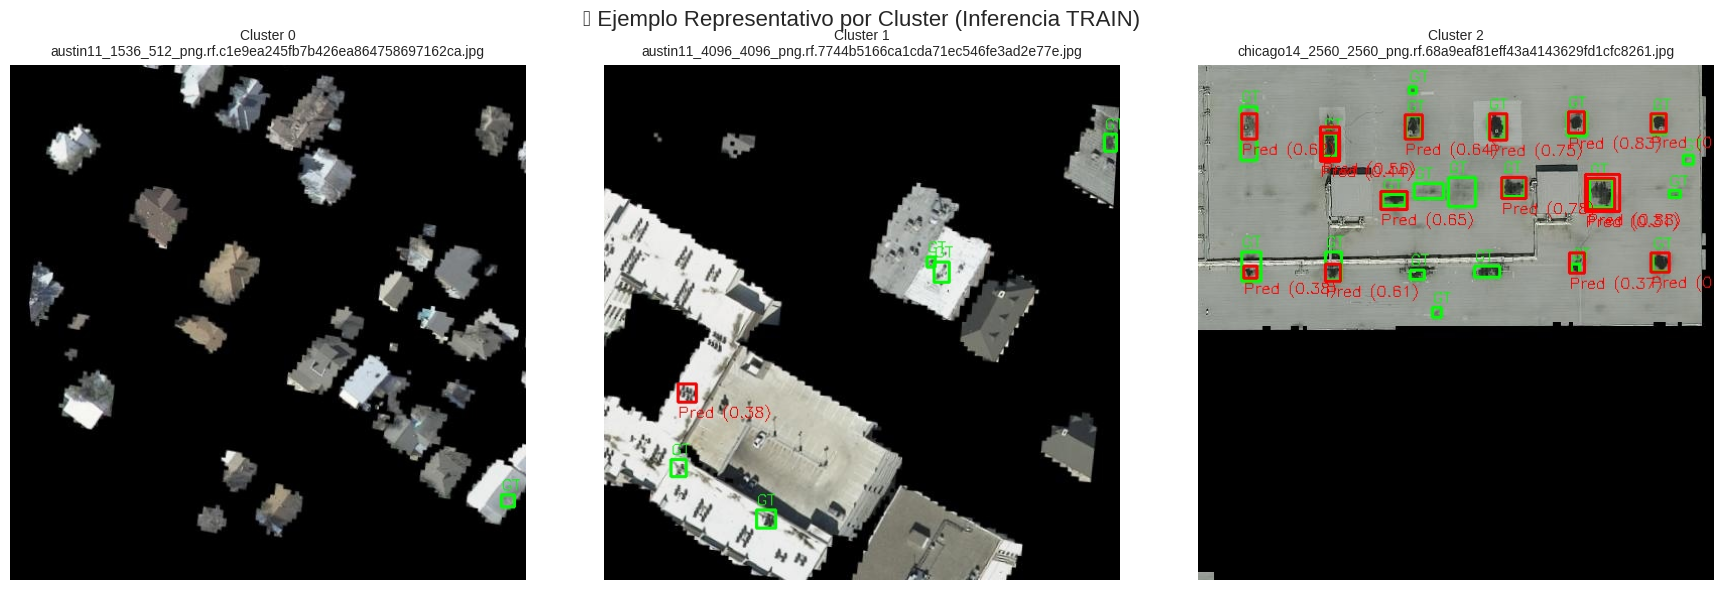

In [13]:
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# 📁 Corregir ruta a las imágenes renderizadas
render_dir = Path("results/train_inference/train_inference")
assert render_dir.exists(), f"❌ Carpeta no encontrada: {render_dir.resolve()}"

# 🔄 Indexar imágenes renderizadas
rendered_files = {f.name: f for f in render_dir.glob("*.jpg")}
print(f"🖼️ Imágenes renderizadas indexadas: {len(rendered_files)}")

# ➕ Enlazar con el DataFrame por nombre exacto
df_metrics["image_render"] = df_metrics["image"].map(rendered_files)

# 🔍 Cuántas no se enlazaron correctamente
missing = df_metrics["image_render"].isna().sum()
print(f"❌ Imágenes sin correspondencia: {missing} / {len(df_metrics)}")

# 📌 Mostrar una imagen representativa por cluster
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for cluster_id in sorted(df_metrics["cluster"].unique()):
    row = df_metrics[df_metrics["cluster"] == cluster_id].iloc[0]
    img_path = row["image_render"]

    axs[cluster_id].set_title(f"Cluster {cluster_id}\n{row['image']}", fontsize=10)

    if isinstance(img_path, Path) and img_path.exists():
        img = cv2.imread(str(img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        axs[cluster_id].imshow(img)
    else:
        axs[cluster_id].text(0.5, 0.5, "Imagen no encontrada", ha='center', va='center', fontsize=10)
        axs[cluster_id].set_facecolor("lightgray")

    axs[cluster_id].axis("off")

plt.suptitle("📌 Ejemplo Representativo por Cluster (Inferencia TRAIN)", fontsize=16)
plt.tight_layout()
plt.show()


## 🔥 Análisis Visual de Imágenes más Críticas

Con el objetivo de identificar y visualizar los casos más extremos o prioritarios, realizamos un análisis de las **top imágenes** en función de distintas métricas clave:

- `damage_count`: número total de defectos detectados por imagen.
- `damage_density`: relación entre número de daños y área del techo.
- `max_confidence`: predicción con mayor nivel de confianza.

Este análisis es esencial para:

- Identificar **casos críticos o anómalos** que requieren atención inmediata.
- Evaluar la **robustez del modelo** en casos con mayor densidad de defectos.
- Nutrir el dashboard final con ejemplos concretos y relevantes.

Las imágenes se muestran junto con el valor correspondiente de la métrica evaluada, lo cual facilita una inspección visual y ayuda a validar la interpretación de los datos.



🔎 Top 3 imágenes por damage_count:

📌 chicago14_2560_2560_png.rf.bc38bd2344c1c3c44d48aa5234ff2f77.jpg → damage_count: 16


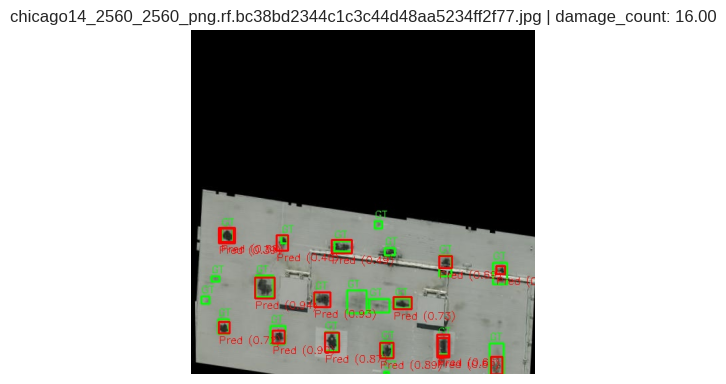

📌 chicago14_2560_2560_png.rf.68a9eaf81eff43a4143629fd1cfc8261.jpg → damage_count: 15


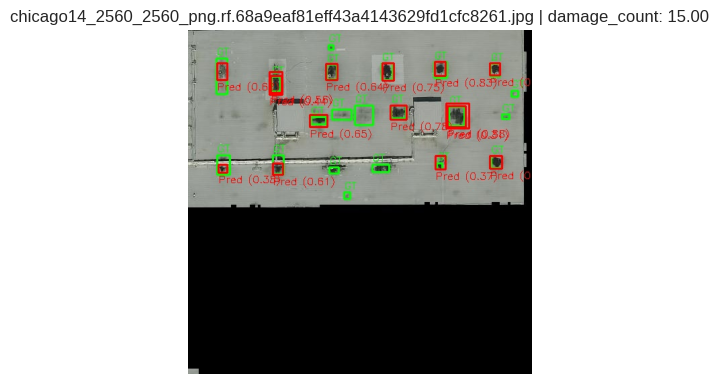

📌 chicago14_2560_2560_png.rf.844af366d3dd2ef4b339b7c41954bb00.jpg → damage_count: 15


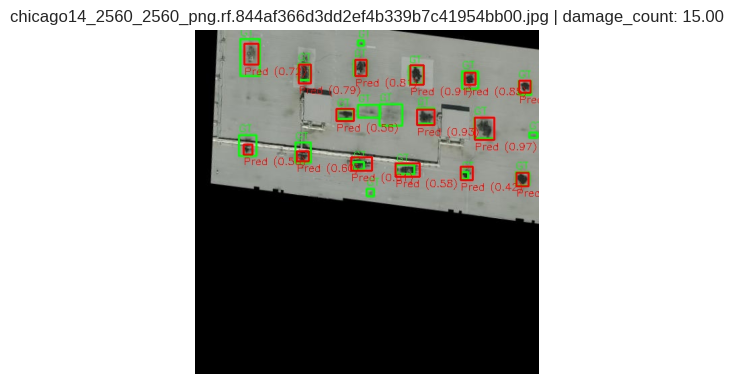


🔎 Top 3 imágenes por damage_density:

📌 chicago14_2560_2560_png.rf.bc38bd2344c1c3c44d48aa5234ff2f77.jpg → damage_density: 6.1e-05


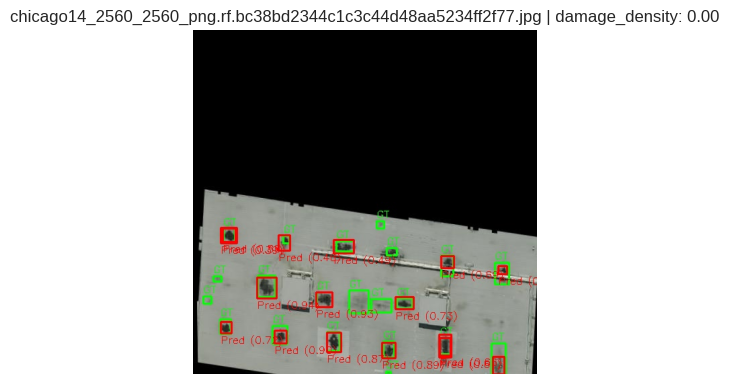

📌 chicago14_2560_2560_png.rf.68a9eaf81eff43a4143629fd1cfc8261.jpg → damage_density: 5.7e-05


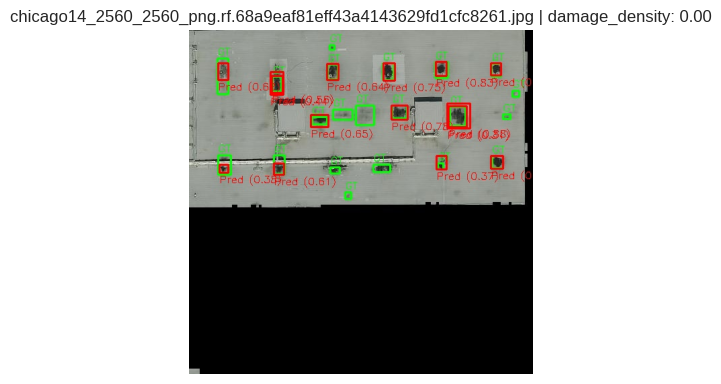

📌 chicago14_2560_2560_png.rf.844af366d3dd2ef4b339b7c41954bb00.jpg → damage_density: 5.7e-05


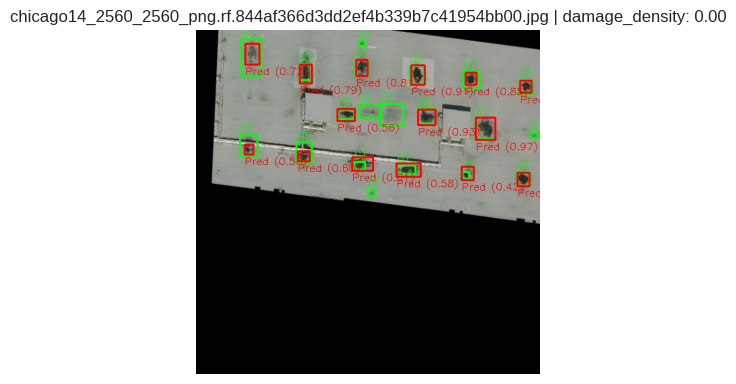


🔎 Top 3 imágenes por max_confidence:

📌 chicago14_2560_2560_png.rf.844af366d3dd2ef4b339b7c41954bb00.jpg → max_confidence: 0.9697


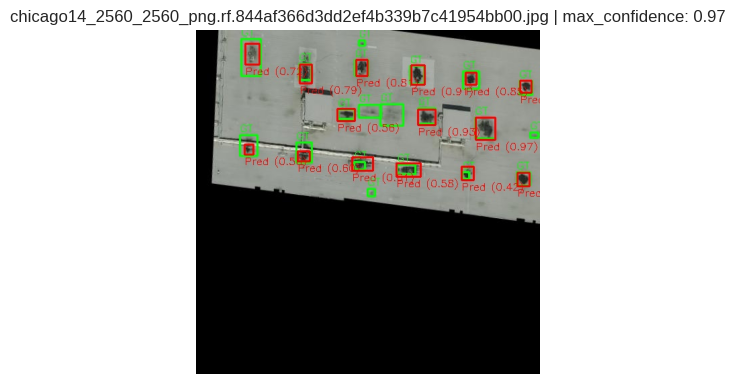

📌 chicago23_1024_0_png.rf.24ef08fd591ccc29418395159fc7b163.jpg → max_confidence: 0.9574


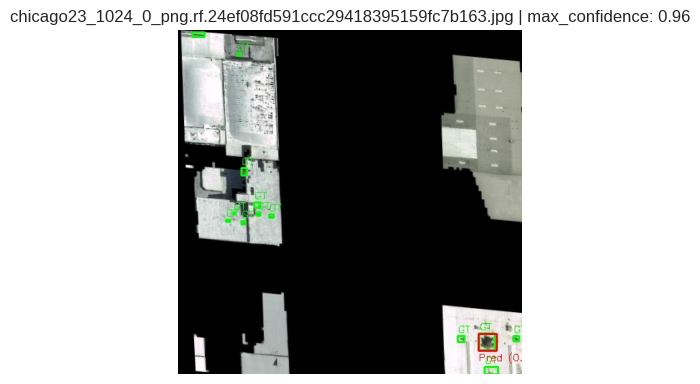

📌 chicago14_2560_2560_png.rf.bc38bd2344c1c3c44d48aa5234ff2f77.jpg → max_confidence: 0.9408


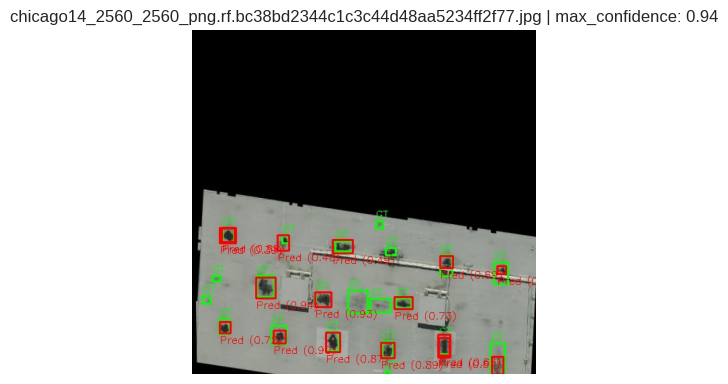

In [14]:
from IPython.display import display
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

# Ruta raíz donde están los .jpg (descargados desde Hugging Face)
root_dir = Path("results/train_inference")
IMAGE_COLUMN = "image"  # nombre correcto según tu df_metrics

def mostrar_top(metric, top_n=3):
    print(f"\n🔎 Top {top_n} imágenes por {metric}:\n")
    
    top_df = df_metrics.sort_values(by=metric, ascending=False).head(top_n)
    
    for idx, row in top_df.iterrows():
        image_name = row[IMAGE_COLUMN]
        print(f"📌 {image_name} → {metric}: {row[metric]}")
        
        try:
            # Buscar en cualquier subcarpeta (como *.jpg)
            img_path = next(root_dir.rglob(image_name))
            img = cv2.imread(str(img_path))
            
            if img is not None:
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                plt.figure(figsize=(6, 4))
                plt.imshow(img)
                plt.title(f"{image_name} | {metric}: {row[metric]:.2f}")
                plt.axis("off")
                plt.tight_layout()
                plt.show()
            else:
                print("❌ No se pudo cargar la imagen:", img_path)
        except StopIteration:
            print(f"❌ Imagen no encontrada en disco: {image_name}")

# Ejecutar para cada métrica clave
for m in ['damage_count', 'damage_density', 'max_confidence']:
    mostrar_top(m)


## 📊 Análisis Comparativo de Métricas por Cluster

Una vez realizados los agrupamientos mediante **KMeans**, es fundamental analizar cómo se comportan las métricas clave dentro de cada cluster. Este análisis nos permite:

- Evaluar la **coherencia interna** de los grupos generados.
- Identificar **clusters críticos**, es decir, aquellos con mayor densidad de daños o confianza en las predicciones.
- Detectar posibles **outliers o variabilidad alta** dentro de los grupos.

🔍 En este bloque se presentan dos tipos de análisis complementarios:

1. **Resumen estadístico** (media, desviación estándar, mínimos y máximos) de cada métrica agrupado por cluster.

2. **Boxplots comparativos** para visualizar la distribución y dispersión de cada métrica por cluster, facilitando la comparación entre grupos y la detección de valores atípicos.

Este análisis es clave para justificar la validez del agrupamiento y preparar visualizaciones específicas en el Dashboard final.


📊 Estadísticas por Cluster (media, desviación, mínimo, máximo):


,damage_count_mean,damage_count_std,damage_count_min,damage_count_max,damage_density_mean,damage_density_std,damage_density_min,damage_density_max,mean_confidence_mean,mean_confidence_std,mean_confidence_min,mean_confidence_max,max_confidence_mean,max_confidence_std,max_confidence_min,max_confidence_max
cluster,,,,,,,,,,,,,,,,
0,0.0000,0.0000,0,0,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000
1,1.7273,1.1707,1,6,0.0000,0.0,0.0000,0.0000,0.4448,0.1548,0.304,0.9574,0.4813,0.1821,0.3040,0.9574
2,15.3333,0.5774,15,16,0.0001,0.0,0.0001,0.0001,0.6663,0.0550,0.605,0.7115,0.9302,0.0457,0.8802,0.9697


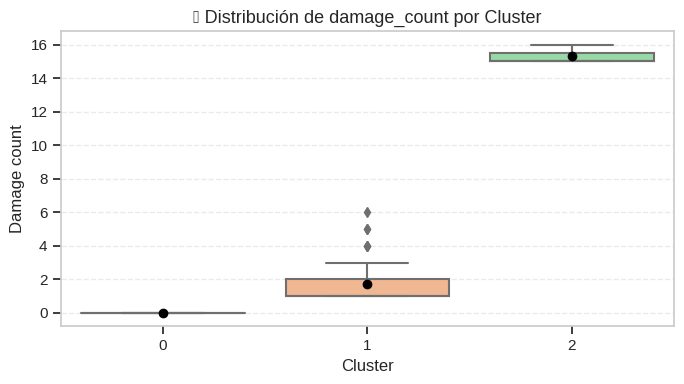

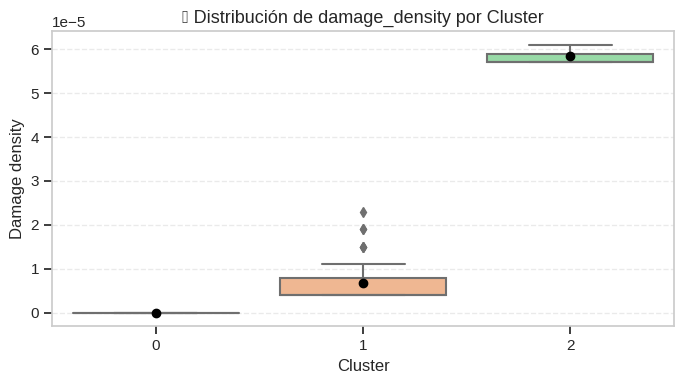

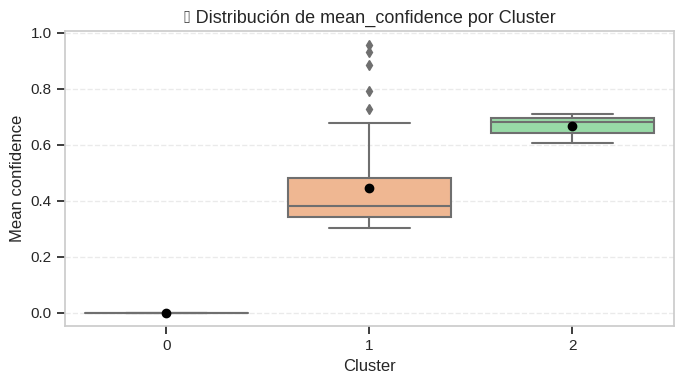

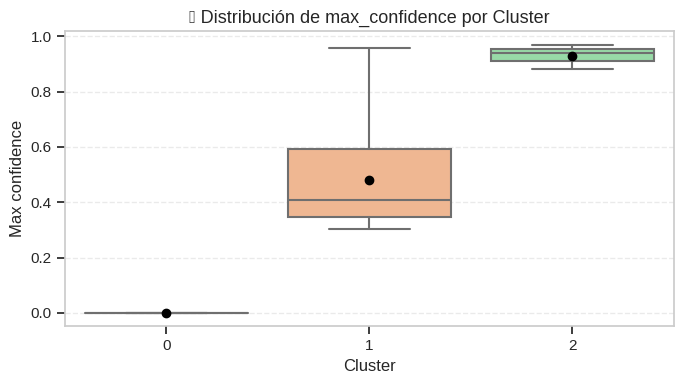

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# ─── Estadísticas agrupadas ────────────────────────────────────────────
cluster_summary = (
    df_metrics.groupby("cluster")[metricas]
    .agg(["mean", "std", "min", "max"])
    .round(4)
)
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns.values]

print("📊 Estadísticas por Cluster (media, desviación, mínimo, máximo):")
display(cluster_summary)

# ─── Boxplots comparativos ─────────────────────────────────────────────
for col in metricas:
    plt.figure(figsize=(7, 4))
    ax = sns.boxplot(x="cluster", y=col, data=df_metrics, palette="pastel", showmeans=True,
                     meanprops={"marker":"o", "markerfacecolor":"black", "markeredgecolor":"black"})
    plt.title(f"🎯 Distribución de {col} por Cluster", fontsize=13)
    plt.xlabel("Cluster")
    plt.ylabel(col.replace("_", " ").capitalize())
    plt.grid(True, axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()




## 🔄 Análisis Multivariado entre Métricas por Cluster

Para entender las **relaciones complejas entre métricas** como `damage_count`, `damage_density`, `mean_confidence` y `max_confidence`, se realiza una visualización de pares (pairplot) que permite:

- Explorar posibles **correlaciones cruzadas** entre variables.
- Observar la **dispersión** de cada grupo de imágenes según sus métricas.
- Validar la **separación de clusters** en el espacio multivariado.
- Identificar **zonas de solapamiento o outliers** que podrían requerir atención.

Este análisis visual es crucial para detectar patrones que no son evidentes en análisis univariados o bivariados simples, y proporciona insights que serán útiles en la etapa de visualización interactiva en el Dashboard.


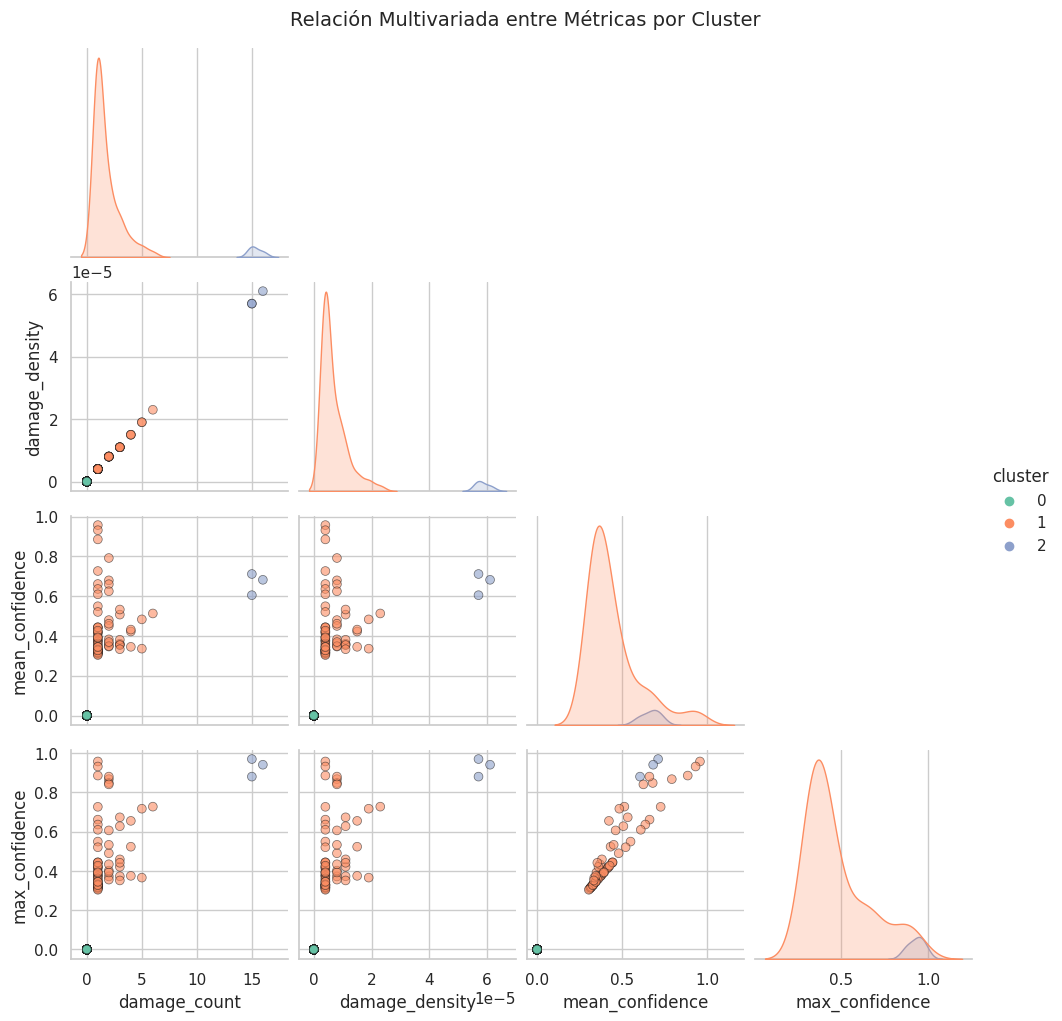

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# 🎨 Configurar estilo global
sns.set(style="whitegrid")

# 📈 Pairplot mejorado
pair = sns.pairplot(
    data=df_metrics[metricas + ["cluster"]],
    hue="cluster",
    palette="Set2",
    diag_kind="kde",
    plot_kws={"alpha": 0.6, "s": 40, "edgecolor": "k"},
    diag_kws={"fill": True},
    corner=True,  # Solo parte inferior triangular
    height=2.5
)

pair.fig.suptitle("Relación Multivariada entre Métricas por Cluster", y=1.02, fontsize=14)
plt.show()


## 💾 Exportación Final de Insumos para el Dashboard

Con el análisis completado, es fundamental **persistir los resultados** de forma estructurada para alimentar un Dashboard profesional.

Este bloque realiza:

1. **Exportación del DataFrame consolidado** (`df_metrics_clustered`) en formato `.csv` y `.pkl`.
2. **Resumen estadístico por cluster** exportado en `.csv` y `.json`, ideal para visualizaciones rápidas o comparativas.
3. **Representantes visuales por cluster** guardados en un archivo `.json` para usarse como muestras en interfaces gráficas.
4. **Estructuración en una carpeta `dashboard_data/`** con todos los elementos listos para ser consumidos por una app en Dash o Gradio.
5. **Compresión en `metrics_data.zip`** para facilitar la descarga, versionamiento o migración del proyecto.

Este paso asegura que todo el trabajo analítico realizado pueda ser reutilizado y presentado de forma profesional e interactiva.


In [17]:
import os
import json
import shutil
from pathlib import Path
from datetime import datetime
from huggingface_hub import HfApi, HfFolder, upload_folder
from kaggle_secrets import UserSecretsClient

IMAGE_COLUMN = "image"  # columna correcta según tu df_metrics

# ─── 1. Exportar DataFrame clusterizado ─────────────────────────────────────
df_metrics.to_csv("df_metrics_clustered.csv", index=False)
df_metrics.to_pickle("df_metrics_clustered.pkl")

# ─── 2. Resumen estadístico por cluster ─────────────────────────────────────
cluster_summary = df_metrics.groupby("cluster").agg({
    "damage_count": ["mean", "std", "min", "max"],
    "mean_confidence": ["mean", "std"],
    "damage_density": ["mean", "max"]
}).round(4)

cluster_summary.to_csv("cluster_summary.csv")
cluster_summary.to_json("cluster_summary.json", orient="index")

# ─── 3. Imágenes representativas por cluster ────────────────────────────────
if IMAGE_COLUMN not in df_metrics.columns:
    raise KeyError(f"❌ La columna '{IMAGE_COLUMN}' no está presente en df_metrics. Columnas: {df_metrics.columns.tolist()}")

cluster_imgs = {}
for cluster_id in sorted(df_metrics["cluster"].unique()):
    image_name = df_metrics[df_metrics["cluster"] == cluster_id].iloc[0][IMAGE_COLUMN]
    cluster_imgs[int(cluster_id)] = image_name

with open("cluster_representatives.json", "w") as f:
    json.dump(cluster_imgs, f, indent=4)

# ─── 4. Estructura de exportación ───────────────────────────────────────────
dashboard_dir = Path("dashboard_data")
dashboard_dir.mkdir(exist_ok=True)

files_to_copy = [
    "df_metrics_clustered.csv",
    "df_metrics_clustered.pkl",
    "cluster_summary.csv",
    "cluster_summary.json",
    "cluster_representatives.json"
]

for f in files_to_copy:
    src = Path(f)
    dst = dashboard_dir / src.name
    if src.exists():
        shutil.copy2(src, dst)
    else:
        print(f"❌ Archivo no encontrado: {f}")

# ─── 5. Metadatos ───────────────────────────────────────────────────────────
metadata = {
    "generated_on": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
    "total_images": len(df_metrics),
    "clusters": sorted(df_metrics["cluster"].unique().tolist()),
    "files": [f.name for f in dashboard_dir.glob("*")],
}
with open(dashboard_dir / "metadata.json", "w") as f:
    json.dump(metadata, f, indent=4)

# ─── 6. Log opcional ────────────────────────────────────────────────────────
with open(dashboard_dir / "log.txt", "w") as log:
    log.write("📦 Exportación de datos para el Dashboard de Techos\n")
    log.write("="*50 + "\n")
    log.write(f"📅 Fecha: {metadata['generated_on']}\n")
    log.write(f"🖼️ Total de imágenes: {metadata['total_images']}\n")
    log.write("📄 Archivos incluidos:\n")
    for name in metadata["files"]:
        log.write(f"  - {name}\n")

# ─── 7. README explicativo ──────────────────────────────────────────────────
readme_path = dashboard_dir / "README.md"
readme_path.write_text(
    "# 📊 Dashboard de Análisis de Techos\n\n"
    "Este directorio contiene archivos preprocesados para alimentar un dashboard interactivo sobre daños en techos:\n\n"
    "- `df_metrics_clustered.*`: DataFrame con métricas por imagen y clusters\n"
    "- `cluster_summary.*`: Estadísticas agrupadas por cluster\n"
    "- `cluster_representatives.json`: Imagen representativa por cluster\n"
    "- `metadata.json`: Información estructural de exportación\n"
    "- `log.txt`: Bitácora de generación\n"
)

# ─── 8. Subida a Hugging Face ───────────────────────────────────────────────
user_secrets = UserSecretsClient()
hf_token = user_secrets.get_secret("HF_TOKEN")
HfFolder.save_token(hf_token)

repo_id = "jobejaranom/roof-dashboard-data"
api = HfApi()

try:
    # Crear repo si no existe
    api.create_repo(
        repo_id=repo_id,
        token=hf_token,
        exist_ok=True,
        private=False,
    )

    # Subir carpeta
    upload_folder(
        repo_id=repo_id,
        folder_path=str(dashboard_dir),
        path_in_repo="dashboard_data",
        commit_message="🚀 Exportación completa para Dashboard interactivo",
        token=hf_token
    )

    print(f"✅ Datos exportados y subidos exitosamente a: https://huggingface.co/{repo_id}/tree/main/dashboard_data")

except Exception as e:
    print(f"❌ Error al subir a Hugging Face: {e}")


Uploading...:   0%|          | 0.00/106k [00:00<?, ?B/s]

✅ Datos exportados y subidos exitosamente a: https://huggingface.co/jobejaranom/roof-dashboard-data/tree/main/dashboard_data
